In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, PReLU
from keras_tuner.tuners import RandomSearch

from sklearn.metrics import mean_absolute_percentage_error

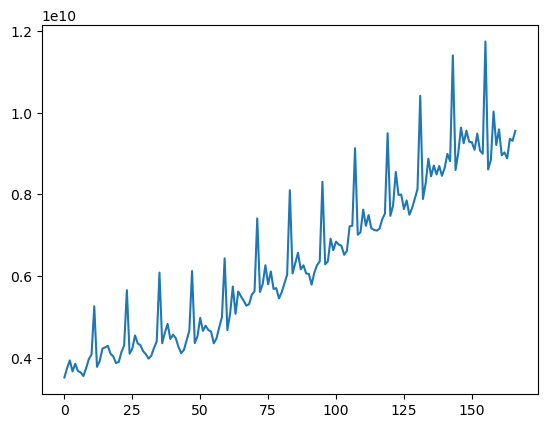

In [2]:
# numpyを使う
# ここでは元系列のまま分析を行う
series = np.loadtxt("../public/seijyo_ishii_monthly_sales_without_header.csv")
plt.plot(series)
plt.show()

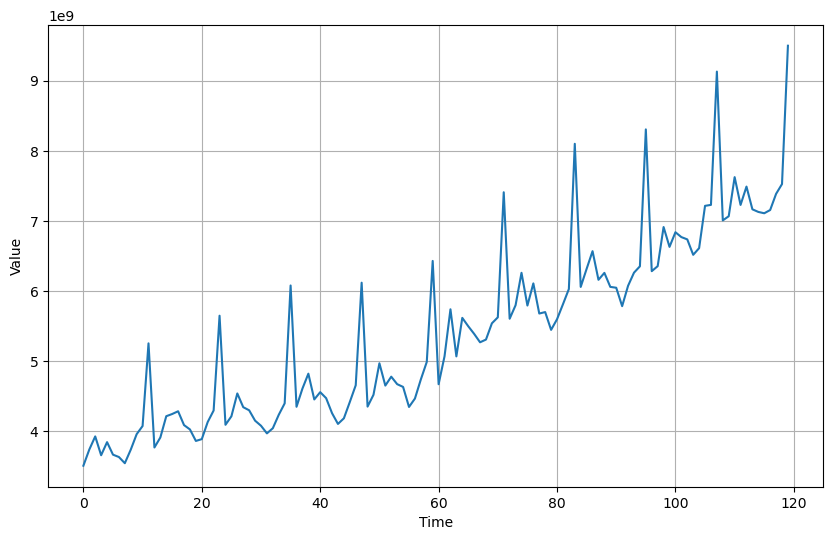

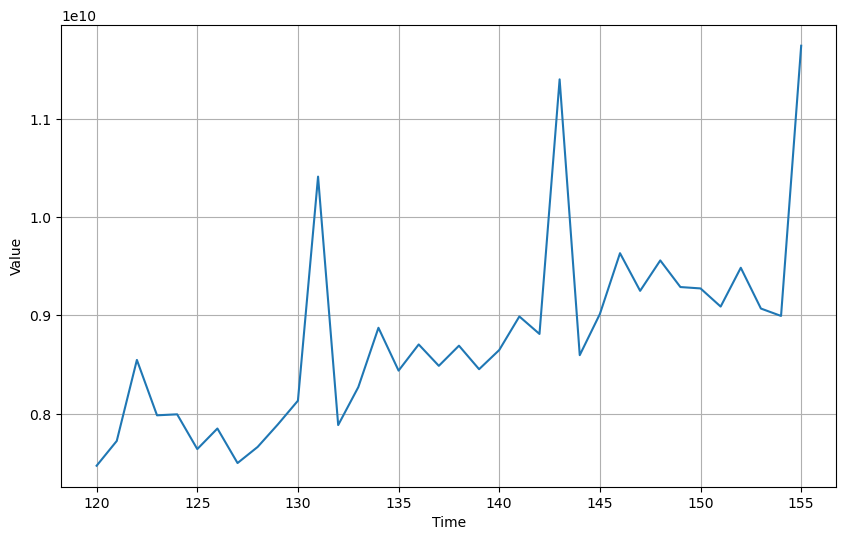

In [3]:
# 前半120時点を学習データ、以降を検証データとして分割

split_time = 120
time = np.arange(156, dtype="float32")    # 2022年12月のデータが取得できれば、168に変更

time_train = time[:split_time]
x_train = series[:split_time]
time_train_pred = time[20:split_time]
time_valid = time[split_time:156]
x_valid = series[split_time:156]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train) # 学習セット
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid) # 検証セット
plt.show()

In [4]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [5]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

2023-01-04 15:03:38.324043: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/500
4/4 [==============================] - 1s 209ms/step - loss: 84.5701
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 83.5441
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 82.3655
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 81.1627
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 79.9228
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 78.7095
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 77.4759
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 76.2789
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 75.1147
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 73.9529
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 72.8234
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 71.7767
Epoch 13/500
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 10.1803
Epoch 104/500
4/4 [==============================] - 0s 3ms/step - loss: 10.1845
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 10.1846
Epoch 106/500
4/4 [==============================] - 0s 3ms/step - loss: 10.1904
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 10.1712
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 10.1666
Epoch 109/500
4/4 [==============================] - 0s 2ms/step - loss: 10.1682
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 10.1667
Epoch 111/500
4/4 [==============================] - 0s 3ms/step - loss: 10.1618
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 10.1600
Epoch 113/500
4/4 [==============================] - 0s 2ms/step - loss: 10.1552
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 10.1464
Epoch 115/500
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 9.9155
Epoch 205/500
4/4 [==============================] - 0s 2ms/step - loss: 9.9114
Epoch 206/500
4/4 [==============================] - 0s 1ms/step - loss: 9.9120
Epoch 207/500
4/4 [==============================] - 0s 1ms/step - loss: 9.9108
Epoch 208/500
4/4 [==============================] - 0s 2ms/step - loss: 9.9053
Epoch 209/500
4/4 [==============================] - 0s 1ms/step - loss: 9.9053
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 9.9032
Epoch 211/500
4/4 [==============================] - 0s 2ms/step - loss: 9.9010
Epoch 212/500
4/4 [==============================] - 0s 2ms/step - loss: 9.8948
Epoch 213/500
4/4 [==============================] - 0s 2ms/step - loss: 9.8921
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 9.8870
Epoch 215/500
4/4 [==============================] - 0s 2ms/step - loss: 9.8857
Epoch 216/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 9.6860
Epoch 307/500
4/4 [==============================] - 0s 2ms/step - loss: 9.6830
Epoch 308/500
4/4 [==============================] - 0s 1ms/step - loss: 9.6823
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 9.6931
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 9.6993
Epoch 311/500
4/4 [==============================] - 0s 2ms/step - loss: 9.6962
Epoch 312/500
4/4 [==============================] - 0s 2ms/step - loss: 9.6934
Epoch 313/500
4/4 [==============================] - 0s 2ms/step - loss: 9.7051
Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 9.7000
Epoch 315/500
4/4 [==============================] - 0s 2ms/step - loss: 9.6854
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 9.6895
Epoch 317/500
4/4 [==============================] - 0s 1ms/step - loss: 9.6735
Epoch 318/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 9.4604
Epoch 409/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4584
Epoch 410/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4578
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4543
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4515
Epoch 413/500
4/4 [==============================] - 0s 1ms/step - loss: 9.4512
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4471
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4501
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4522
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4524
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4443
Epoch 419/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4361
Epoch 420/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 12ms/step


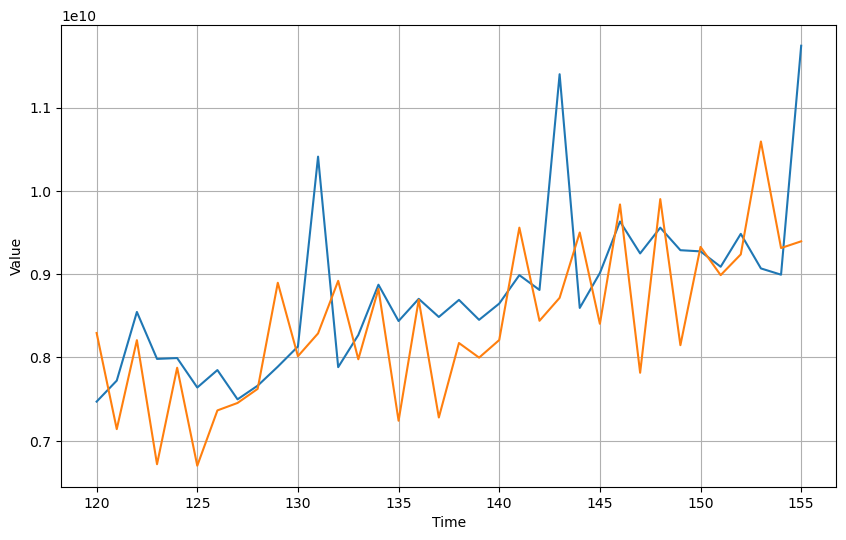

In [6]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [7]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.07933630677826614


In [8]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 10ms/step - loss: 38.4982
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 36.7329
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 34.7050
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 32.7300
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 30.8604
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 29.1018
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 27.6320
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 26.2430
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 24.7510
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 23.3659
Epoch 11/500
4/4 [==============================] - 0s 26ms/step - loss: 21.9609
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 20.5371
Epoch 13/500
4/4 [==============================] - 0s 4ms/

4/4 [==============================] - 0s 2ms/step - loss: 7.1803
Epoch 105/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1757
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 7.1589
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 7.1485
Epoch 108/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1407
Epoch 109/500
4/4 [==============================] - 0s 2ms/step - loss: 7.1428
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 7.1323
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 7.1205
Epoch 112/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1168
Epoch 113/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1191
Epoch 114/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1160
Epoch 115/500
4/4 [==============================] - 0s 2ms/step - loss: 7.1063
Epoch 116/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 1ms/step - loss: 7.0089
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 7.0131
Epoch 208/500
4/4 [==============================] - 0s 1ms/step - loss: 7.0204
Epoch 209/500
4/4 [==============================] - 0s 1ms/step - loss: 7.0049
Epoch 210/500
4/4 [==============================] - 0s 1ms/step - loss: 7.0230
Epoch 211/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0240
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0031
Epoch 213/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0061
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 7.0120
Epoch 215/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0133
Epoch 216/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0190
Epoch 217/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0033
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 6.9442
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9445
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9803
Epoch 311/500
4/4 [==============================] - 0s 1ms/step - loss: 6.9659
Epoch 312/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9647
Epoch 313/500
4/4 [==============================] - 0s 3ms/step - loss: 6.9590
Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9456
Epoch 315/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9449
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9405
Epoch 317/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9529
Epoch 318/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9397
Epoch 319/500
4/4 [==============================] - 0s 3ms/step - loss: 6.9517
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 6.8852
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8861
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8886
Epoch 413/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8868
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8880
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8846
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8865
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8847
Epoch 418/500
4/4 [==============================] - 0s 3ms/step - loss: 6.8902
Epoch 419/500
4/4 [==============================] - 0s 2ms/step - loss: 6.8889
Epoch 420/500
4/4 [==============================] - 0s 3ms/step - loss: 6.8860
Epoch 421/500
4/4 [==============================] - 0s 3ms/step - loss: 6.8870
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 34ms/step


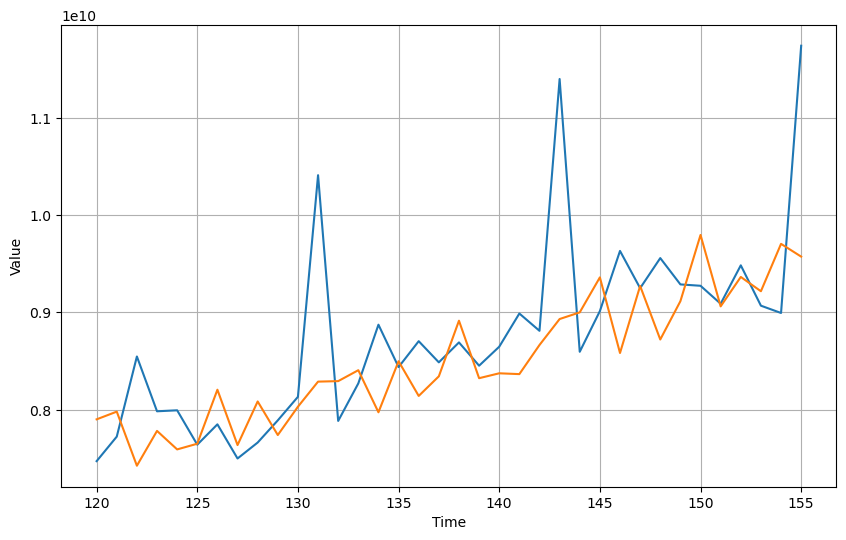

In [9]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [10]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.05395681799574405


In [12]:
%%time
# エポック数を1000にしてみる
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=1000,verbose=1)

Epoch 1/1000


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 42ms/step - loss: 104.3610
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 104.0769
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 103.7535
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 103.4363
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 103.1293
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 102.8267
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 102.5237
Epoch 8/1000
4/4 [==============================] - 0s 9ms/step - loss: 102.2130
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 101.9069
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.5943
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.2864
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 100.9774
Epoch 13/1000
4/4 [==================

4/4 [==============================] - 0s 3ms/step - loss: 71.8809
Epoch 103/1000
4/4 [==============================] - 0s 4ms/step - loss: 71.4379
Epoch 104/1000
4/4 [==============================] - 0s 3ms/step - loss: 71.0049
Epoch 105/1000
4/4 [==============================] - 0s 3ms/step - loss: 70.5544
Epoch 106/1000
4/4 [==============================] - 0s 3ms/step - loss: 70.0968
Epoch 107/1000
4/4 [==============================] - 0s 3ms/step - loss: 69.6360
Epoch 108/1000
4/4 [==============================] - 0s 3ms/step - loss: 69.1634
Epoch 109/1000
4/4 [==============================] - 0s 3ms/step - loss: 68.6749
Epoch 110/1000
4/4 [==============================] - 0s 4ms/step - loss: 68.1747
Epoch 111/1000
4/4 [==============================] - 0s 2ms/step - loss: 67.6767
Epoch 112/1000
4/4 [==============================] - 0s 3ms/step - loss: 67.1741
Epoch 113/1000
4/4 [==============================] - 0s 2ms/step - loss: 66.6584
Epoch 114/1000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.3704
Epoch 203/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.3704
Epoch 204/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.3629
Epoch 205/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.3470
Epoch 206/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.3471
Epoch 207/1000
4/4 [==============================] - 0s 4ms/step - loss: 7.3536
Epoch 208/1000
4/4 [==============================] - 0s 6ms/step - loss: 7.3368
Epoch 209/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.3432
Epoch 210/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.3430
Epoch 211/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.3439
Epoch 212/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.3422
Epoch 213/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.3399
Epoch 214/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 7.2617
Epoch 304/1000
4/4 [==============================] - 0s 4ms/step - loss: 7.2609
Epoch 305/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.2593
Epoch 306/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.2607
Epoch 307/1000
4/4 [==============================] - 0s 4ms/step - loss: 7.2701
Epoch 308/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.2573
Epoch 309/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.2571
Epoch 310/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.2611
Epoch 311/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.2563
Epoch 312/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.2613
Epoch 313/1000
4/4 [==============================] - 0s 4ms/step - loss: 7.2570
Epoch 314/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.2463
Epoch 315/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 7.1885
Epoch 405/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1895
Epoch 406/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1918
Epoch 407/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.1962
Epoch 408/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1872
Epoch 409/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1833
Epoch 410/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1808
Epoch 411/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1967
Epoch 412/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1833
Epoch 413/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.1787
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1854
Epoch 415/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1961
Epoch 416/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 7.1187
Epoch 506/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.1166
Epoch 507/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1063
Epoch 508/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1057
Epoch 509/1000
4/4 [==============================] - 0s 4ms/step - loss: 7.1077
Epoch 510/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1148
Epoch 511/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1078
Epoch 512/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1093
Epoch 513/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1104
Epoch 514/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1033
Epoch 515/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1031
Epoch 516/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.1212
Epoch 517/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 7.0501
Epoch 607/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0446
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0448
Epoch 609/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.0475
Epoch 610/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.0461
Epoch 611/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.0414
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0479
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0501
Epoch 614/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0416
Epoch 615/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0435
Epoch 616/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0431
Epoch 617/1000
4/4 [==============================] - 0s 3ms/step - loss: 7.0400
Epoch 618/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 6.9833
Epoch 708/1000
4/4 [==============================] - 0s 3ms/step - loss: 6.9808
Epoch 709/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9824
Epoch 710/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9830
Epoch 711/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9775
Epoch 712/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0052
Epoch 713/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.0021
Epoch 714/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9919
Epoch 715/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9788
Epoch 716/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9785
Epoch 717/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9773
Epoch 718/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9787
Epoch 719/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 6.9167
Epoch 809/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9269
Epoch 810/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9258
Epoch 811/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9243
Epoch 812/1000
4/4 [==============================] - 0s 4ms/step - loss: 6.9202
Epoch 813/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9212
Epoch 814/1000
4/4 [==============================] - 0s 3ms/step - loss: 6.9248
Epoch 815/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9211
Epoch 816/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9223
Epoch 817/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9207
Epoch 818/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9173
Epoch 819/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.9289
Epoch 820/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 6.8721
Epoch 910/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.8830
Epoch 911/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.8686
Epoch 912/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.8664
Epoch 913/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.8644
Epoch 914/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.8677
Epoch 915/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.8654
Epoch 916/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.8696
Epoch 917/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.8811
Epoch 918/1000
4/4 [==============================] - 0s 3ms/step - loss: 6.8693
Epoch 919/1000
4/4 [==============================] - 0s 3ms/step - loss: 6.8645
Epoch 920/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.8644
Epoch 921/1000
4/4 [=======================

1/1 [==============================] - 0s 18ms/step


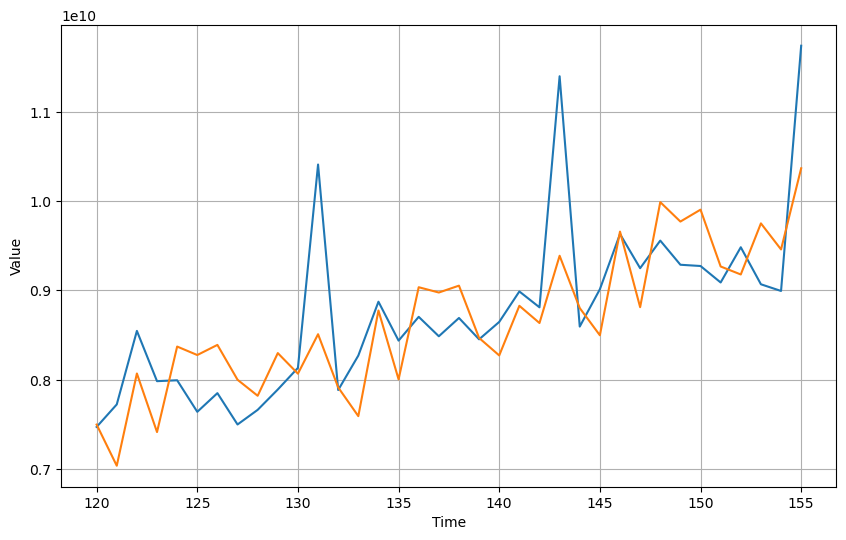

In [13]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [14]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.05242352334133613


In [15]:
%%time
# エポック数を2000にしてみる
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=2000,verbose=1)

Epoch 1/2000


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 9ms/step - loss: 113.4907
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 113.2354
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 112.9446
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 112.6528
Epoch 5/2000
4/4 [==============================] - 0s 3ms/step - loss: 112.3600
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 112.0706
Epoch 7/2000
4/4 [==============================] - 0s 7ms/step - loss: 111.7820
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 111.4934
Epoch 9/2000
4/4 [==============================] - 0s 4ms/step - loss: 111.2072
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 110.9228
Epoch 11/2000
4/4 [==============================] - 0s 4ms/step - loss: 110.6387
Epoch 12/2000
4/4 [==============================] - 0s 4ms/step - loss: 110.3533
Epoch 13/2000
4/4 [===================

4/4 [==============================] - 0s 2ms/step - loss: 85.6836
Epoch 102/2000
4/4 [==============================] - 0s 2ms/step - loss: 85.3958
Epoch 103/2000
4/4 [==============================] - 0s 2ms/step - loss: 85.1016
Epoch 104/2000
4/4 [==============================] - 0s 1ms/step - loss: 84.8075
Epoch 105/2000
4/4 [==============================] - 0s 2ms/step - loss: 84.5149
Epoch 106/2000
4/4 [==============================] - 0s 2ms/step - loss: 84.2219
Epoch 107/2000
4/4 [==============================] - 0s 2ms/step - loss: 83.9305
Epoch 108/2000
4/4 [==============================] - 0s 2ms/step - loss: 83.6381
Epoch 109/2000
4/4 [==============================] - 0s 2ms/step - loss: 83.3457
Epoch 110/2000
4/4 [==============================] - 0s 2ms/step - loss: 83.0494
Epoch 111/2000
4/4 [==============================] - 0s 2ms/step - loss: 82.7524
Epoch 112/2000
4/4 [==============================] - 0s 2ms/step - loss: 82.4533
Epoch 113/2000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 50.0745
Epoch 202/2000
4/4 [==============================] - 0s 2ms/step - loss: 49.6253
Epoch 203/2000
4/4 [==============================] - 0s 2ms/step - loss: 49.1684
Epoch 204/2000
4/4 [==============================] - 0s 2ms/step - loss: 48.7027
Epoch 205/2000
4/4 [==============================] - 0s 2ms/step - loss: 48.2317
Epoch 206/2000
4/4 [==============================] - 0s 2ms/step - loss: 47.7589
Epoch 207/2000
4/4 [==============================] - 0s 2ms/step - loss: 47.2905
Epoch 208/2000
4/4 [==============================] - 0s 2ms/step - loss: 46.8151
Epoch 209/2000
4/4 [==============================] - 0s 2ms/step - loss: 46.3346
Epoch 210/2000
4/4 [==============================] - 0s 3ms/step - loss: 45.8489
Epoch 211/2000
4/4 [==============================] - 0s 2ms/step - loss: 45.3590
Epoch 212/2000
4/4 [==============================] - 0s 2ms/step - loss: 44.8742
Epoch 213/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.6306
Epoch 302/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.6263
Epoch 303/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.6229
Epoch 304/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.6234
Epoch 305/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.6288
Epoch 306/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.6213
Epoch 307/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.6202
Epoch 308/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.6208
Epoch 309/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.6205
Epoch 310/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.6196
Epoch 311/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.6199
Epoch 312/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.6180
Epoch 313/2000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 7.5818
Epoch 403/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5793
Epoch 404/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.5795
Epoch 405/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5797
Epoch 406/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5820
Epoch 407/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5783
Epoch 408/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5856
Epoch 409/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.5815
Epoch 410/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5768
Epoch 411/2000
4/4 [==============================] - 0s 5ms/step - loss: 7.5759
Epoch 412/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5750
Epoch 413/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5782
Epoch 414/2000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 7.5452
Epoch 504/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5415
Epoch 505/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5405
Epoch 506/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5378
Epoch 507/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5359
Epoch 508/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5366
Epoch 509/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5346
Epoch 510/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5374
Epoch 511/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5345
Epoch 512/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5327
Epoch 513/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5396
Epoch 514/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.5375
Epoch 515/2000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 7.4892
Epoch 605/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4926
Epoch 606/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.4925
Epoch 607/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.4829
Epoch 608/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4841
Epoch 609/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4847
Epoch 610/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4803
Epoch 611/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4850
Epoch 612/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4823
Epoch 613/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4796
Epoch 614/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4792
Epoch 615/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4810
Epoch 616/2000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 7.4244
Epoch 706/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4247
Epoch 707/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.4268
Epoch 708/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4258
Epoch 709/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4241
Epoch 710/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4180
Epoch 711/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4166
Epoch 712/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4175
Epoch 713/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4145
Epoch 714/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4194
Epoch 715/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4210
Epoch 716/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.4231
Epoch 717/2000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 7.3516
Epoch 807/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.3476
Epoch 808/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.3481
Epoch 809/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.3480
Epoch 810/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.3496
Epoch 811/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.3559
Epoch 812/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.3591
Epoch 813/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.3515
Epoch 814/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.3406
Epoch 815/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.3491
Epoch 816/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.3471
Epoch 817/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.3441
Epoch 818/2000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 7.2784
Epoch 908/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.2713
Epoch 909/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2735
Epoch 910/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2696
Epoch 911/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2703
Epoch 912/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2685
Epoch 913/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.2690
Epoch 914/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2678
Epoch 915/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2667
Epoch 916/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2745
Epoch 917/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2701
Epoch 918/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2681
Epoch 919/2000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 7.2228
Epoch 1009/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.2223
Epoch 1010/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2262
Epoch 1011/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2245
Epoch 1012/2000
4/4 [==============================] - 0s 5ms/step - loss: 7.2191
Epoch 1013/2000
4/4 [==============================] - 0s 5ms/step - loss: 7.2224
Epoch 1014/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.2200
Epoch 1015/2000
4/4 [==============================] - 0s 5ms/step - loss: 7.2198
Epoch 1016/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.2340
Epoch 1017/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2307
Epoch 1018/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.2256
Epoch 1019/2000
4/4 [==============================] - 0s 4ms/step - loss: 7.2191
Epoch 1020/2000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 7.1979
Epoch 1109/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1944
Epoch 1110/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1985
Epoch 1111/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1902
Epoch 1112/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.1925
Epoch 1113/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1863
Epoch 1114/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1864
Epoch 1115/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1871
Epoch 1116/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1867
Epoch 1117/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1866
Epoch 1118/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1884
Epoch 1119/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1838
Epoch 1120/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.1690
Epoch 1209/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.1674
Epoch 1210/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1764
Epoch 1211/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1771
Epoch 1212/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1846
Epoch 1213/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1839
Epoch 1214/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1771
Epoch 1215/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1748
Epoch 1216/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1704
Epoch 1217/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1688
Epoch 1218/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1650
Epoch 1219/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1656
Epoch 1220/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.1513
Epoch 1309/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1478
Epoch 1310/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1555
Epoch 1311/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1481
Epoch 1312/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1475
Epoch 1313/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1495
Epoch 1314/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1467
Epoch 1315/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1523
Epoch 1316/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1563
Epoch 1317/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1488
Epoch 1318/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.1480
Epoch 1319/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1493
Epoch 1320/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.1392
Epoch 1409/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1309
Epoch 1410/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1313
Epoch 1411/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1303
Epoch 1412/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1314
Epoch 1413/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1320
Epoch 1414/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1291
Epoch 1415/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1290
Epoch 1416/2000
4/4 [==============================] - 0s 1ms/step - loss: 7.1285
Epoch 1417/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1297
Epoch 1418/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1309
Epoch 1419/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1326
Epoch 1420/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.1129
Epoch 1509/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1150
Epoch 1510/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1177
Epoch 1511/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1162
Epoch 1512/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1171
Epoch 1513/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.1211
Epoch 1514/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1187
Epoch 1515/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1129
Epoch 1516/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1107
Epoch 1517/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1144
Epoch 1518/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1168
Epoch 1519/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.1186
Epoch 1520/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.0985
Epoch 1609/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.0913
Epoch 1610/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0976
Epoch 1611/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.0912
Epoch 1612/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0931
Epoch 1613/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0904
Epoch 1614/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0944
Epoch 1615/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0906
Epoch 1616/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0913
Epoch 1617/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0989
Epoch 1618/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0940
Epoch 1619/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0901
Epoch 1620/2000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 7.0759
Epoch 1709/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.0853
Epoch 1710/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0907
Epoch 1711/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0909
Epoch 1712/2000
4/4 [==============================] - 0s 4ms/step - loss: 7.0944
Epoch 1713/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0913
Epoch 1714/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0887
Epoch 1715/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.0955
Epoch 1716/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0934
Epoch 1717/2000
4/4 [==============================] - 0s 4ms/step - loss: 7.0969
Epoch 1718/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0936
Epoch 1719/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0928
Epoch 1720/2000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 7.0546
Epoch 1809/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0592
Epoch 1810/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0604
Epoch 1811/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0567
Epoch 1812/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.0573
Epoch 1813/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0585
Epoch 1814/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.0577
Epoch 1815/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0579
Epoch 1816/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0615
Epoch 1817/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0563
Epoch 1818/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0550
Epoch 1819/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0572
Epoch 1820/2000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.0404
Epoch 1909/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.0409
Epoch 1910/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0413
Epoch 1911/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0473
Epoch 1912/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0508
Epoch 1913/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.0563
Epoch 1914/2000
4/4 [==============================] - 0s 3ms/step - loss: 7.0515
Epoch 1915/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0503
Epoch 1916/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0473
Epoch 1917/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0452
Epoch 1918/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0401
Epoch 1919/2000
4/4 [==============================] - 0s 2ms/step - loss: 7.0378
Epoch 1920/2000
4/4 [===========

1/1 [==============================] - 0s 14ms/step


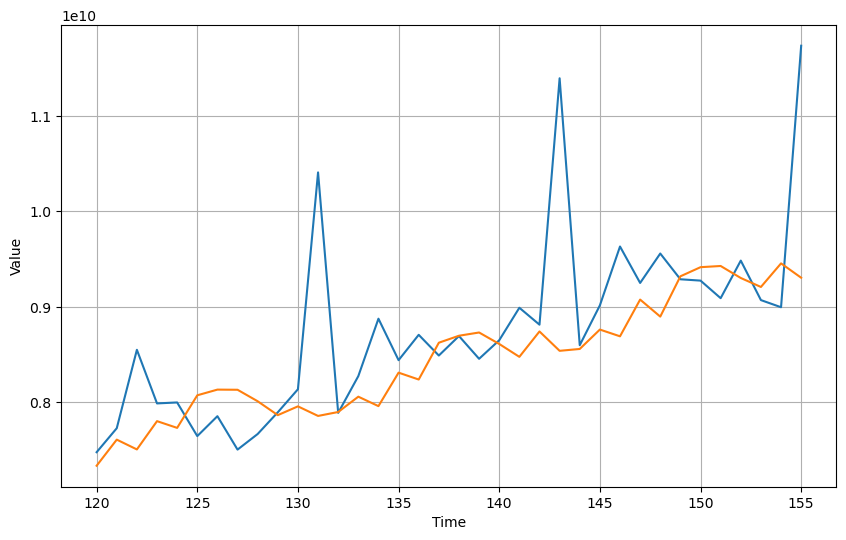

In [16]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [17]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.0512490865044196


In [18]:
%%time
# エポック数を5000にしてみる
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.5))
model.fit(dataset,epochs=5000,verbose=1)

Epoch 1/5000


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 7ms/step - loss: 151.8887
Epoch 2/5000
4/4 [==============================] - 0s 2ms/step - loss: 150.7569
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 149.4666
Epoch 4/5000
4/4 [==============================] - 0s 3ms/step - loss: 148.1768
Epoch 5/5000
4/4 [==============================] - 0s 2ms/step - loss: 146.8828
Epoch 6/5000
4/4 [==============================] - 0s 3ms/step - loss: 145.5959
Epoch 7/5000
4/4 [==============================] - 0s 2ms/step - loss: 144.3283
Epoch 8/5000
4/4 [==============================] - 0s 3ms/step - loss: 143.0619
Epoch 9/5000
4/4 [==============================] - 0s 2ms/step - loss: 141.8028
Epoch 10/5000
4/4 [==============================] - 0s 2ms/step - loss: 140.5496
Epoch 11/5000
4/4 [==============================] - 0s 3ms/step - loss: 139.3105
Epoch 12/5000
4/4 [==============================] - 0s 3ms/step - loss: 138.0761
Epoch 13/5000
4/4 [===================

4/4 [==============================] - 0s 3ms/step - loss: 33.6831
Epoch 102/5000
4/4 [==============================] - 0s 3ms/step - loss: 32.3944
Epoch 103/5000
4/4 [==============================] - 0s 2ms/step - loss: 31.0896
Epoch 104/5000
4/4 [==============================] - 0s 3ms/step - loss: 29.7911
Epoch 105/5000
4/4 [==============================] - 0s 4ms/step - loss: 28.4789
Epoch 106/5000
4/4 [==============================] - 0s 6ms/step - loss: 27.1574
Epoch 107/5000
4/4 [==============================] - 0s 2ms/step - loss: 25.8592
Epoch 108/5000
4/4 [==============================] - 0s 3ms/step - loss: 24.5396
Epoch 109/5000
4/4 [==============================] - 0s 3ms/step - loss: 23.1938
Epoch 110/5000
4/4 [==============================] - 0s 2ms/step - loss: 21.8381
Epoch 111/5000
4/4 [==============================] - 0s 2ms/step - loss: 20.4803
Epoch 112/5000
4/4 [==============================] - 0s 2ms/step - loss: 19.1050
Epoch 113/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.5177
Epoch 203/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.5187
Epoch 204/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.5155
Epoch 205/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.5247
Epoch 206/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.5177
Epoch 207/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.5156
Epoch 208/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.5128
Epoch 209/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.5035
Epoch 210/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.5021
Epoch 211/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.4987
Epoch 212/5000
4/4 [==============================] - 0s 6ms/step - loss: 7.4948
Epoch 213/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.4910
Epoch 214/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 7.2865
Epoch 304/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2900
Epoch 305/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2937
Epoch 306/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2962
Epoch 307/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2896
Epoch 308/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2948
Epoch 309/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2961
Epoch 310/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2845
Epoch 311/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2752
Epoch 312/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2724
Epoch 313/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2711
Epoch 314/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2716
Epoch 315/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 7.2166
Epoch 405/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2037
Epoch 406/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2138
Epoch 407/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.2125
Epoch 408/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2041
Epoch 409/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2025
Epoch 410/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.2001
Epoch 411/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2082
Epoch 412/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.2059
Epoch 413/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2130
Epoch 414/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2079
Epoch 415/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.2091
Epoch 416/5000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 7.1670
Epoch 506/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1638
Epoch 507/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1788
Epoch 508/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.1706
Epoch 509/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1647
Epoch 510/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.1669
Epoch 511/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1602
Epoch 512/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1627
Epoch 513/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1610
Epoch 514/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.1617
Epoch 515/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1570
Epoch 516/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1593
Epoch 517/5000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 7.1260
Epoch 607/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1326
Epoch 608/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1267
Epoch 609/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1259
Epoch 610/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1245
Epoch 611/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1243
Epoch 612/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1250
Epoch 613/5000
4/4 [==============================] - 0s 8ms/step - loss: 7.1357
Epoch 614/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1408
Epoch 615/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1265
Epoch 616/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.1330
Epoch 617/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1246
Epoch 618/5000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 7.1009
Epoch 708/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0959
Epoch 709/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.1162
Epoch 710/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1062
Epoch 711/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0999
Epoch 712/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0958
Epoch 713/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0906
Epoch 714/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.1010
Epoch 715/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.1148
Epoch 716/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0959
Epoch 717/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0944
Epoch 718/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0863
Epoch 719/5000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 7.0628
Epoch 809/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.0663
Epoch 810/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0650
Epoch 811/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.0623
Epoch 812/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0622
Epoch 813/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0639
Epoch 814/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0736
Epoch 815/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0707
Epoch 816/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0675
Epoch 817/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0627
Epoch 818/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0764
Epoch 819/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0607
Epoch 820/5000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 7.0432
Epoch 910/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0406
Epoch 911/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0414
Epoch 912/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0431
Epoch 913/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.0598
Epoch 914/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.0502
Epoch 915/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.0529
Epoch 916/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.0441
Epoch 917/5000
4/4 [==============================] - 0s 5ms/step - loss: 7.0414
Epoch 918/5000
4/4 [==============================] - 0s 6ms/step - loss: 7.0299
Epoch 919/5000
4/4 [==============================] - 0s 8ms/step - loss: 7.0326
Epoch 920/5000
4/4 [==============================] - 0s 22ms/step - loss: 7.0265
Epoch 921/5000
4/4 [======================

4/4 [==============================] - 0s 6ms/step - loss: 7.0010
Epoch 1011/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.0026
Epoch 1012/5000
4/4 [==============================] - 0s 11ms/step - loss: 7.0131
Epoch 1013/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.0036
Epoch 1014/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0032
Epoch 1015/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.0005
Epoch 1016/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.0021
Epoch 1017/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0035
Epoch 1018/5000
4/4 [==============================] - 0s 4ms/step - loss: 7.0025
Epoch 1019/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0321
Epoch 1020/5000
4/4 [==============================] - 0s 3ms/step - loss: 7.0206
Epoch 1021/5000
4/4 [==============================] - 0s 7ms/step - loss: 7.0194
Epoch 1022/5000
4/4 [==========

4/4 [==============================] - 0s 2ms/step - loss: 6.9965
Epoch 1111/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0019
Epoch 1112/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0028
Epoch 1113/5000
4/4 [==============================] - 0s 2ms/step - loss: 7.0100
Epoch 1114/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9973
Epoch 1115/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9784
Epoch 1116/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9707
Epoch 1117/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9757
Epoch 1118/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9766
Epoch 1119/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9758
Epoch 1120/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9737
Epoch 1121/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9699
Epoch 1122/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.9550
Epoch 1211/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9474
Epoch 1212/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9444
Epoch 1213/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9446
Epoch 1214/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9463
Epoch 1215/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9453
Epoch 1216/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9435
Epoch 1217/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9424
Epoch 1218/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9487
Epoch 1219/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9546
Epoch 1220/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9485
Epoch 1221/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9403
Epoch 1222/5000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 6.9181
Epoch 1311/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9248
Epoch 1312/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9280
Epoch 1313/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9259
Epoch 1314/5000
4/4 [==============================] - 0s 4ms/step - loss: 6.9226
Epoch 1315/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9381
Epoch 1316/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9464
Epoch 1317/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9404
Epoch 1318/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9376
Epoch 1319/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9325
Epoch 1320/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9462
Epoch 1321/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9361
Epoch 1322/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.8842
Epoch 1411/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.9006
Epoch 1412/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8943
Epoch 1413/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8990
Epoch 1414/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9095
Epoch 1415/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.9049
Epoch 1416/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8978
Epoch 1417/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8968
Epoch 1418/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8936
Epoch 1419/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8892
Epoch 1420/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8877
Epoch 1421/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8874
Epoch 1422/5000
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 6.8657
Epoch 1511/5000
4/4 [==============================] - 0s 5ms/step - loss: 6.8634
Epoch 1512/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8657
Epoch 1513/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8646
Epoch 1514/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.8630
Epoch 1515/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8793
Epoch 1516/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8636
Epoch 1517/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8683
Epoch 1518/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8690
Epoch 1519/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.8758
Epoch 1520/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8737
Epoch 1521/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8724
Epoch 1522/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 6.8718
Epoch 1611/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8728
Epoch 1612/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8836
Epoch 1613/5000
4/4 [==============================] - 0s 4ms/step - loss: 6.8810
Epoch 1614/5000
4/4 [==============================] - 0s 4ms/step - loss: 6.8926
Epoch 1615/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8700
Epoch 1616/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8670
Epoch 1617/5000
4/4 [==============================] - 0s 4ms/step - loss: 6.8816
Epoch 1618/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.8665
Epoch 1619/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8650
Epoch 1620/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8670
Epoch 1621/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.8620
Epoch 1622/5000
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 6.8175
Epoch 1711/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8092
Epoch 1712/5000
4/4 [==============================] - 0s 4ms/step - loss: 6.8250
Epoch 1713/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.8187
Epoch 1714/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.8153
Epoch 1715/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.8254
Epoch 1716/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8270
Epoch 1717/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8149
Epoch 1718/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8165
Epoch 1719/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8141
Epoch 1720/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8132
Epoch 1721/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.8072
Epoch 1722/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.7976
Epoch 1811/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7846
Epoch 1812/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7859
Epoch 1813/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7873
Epoch 1814/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7863
Epoch 1815/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7851
Epoch 1816/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7881
Epoch 1817/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7892
Epoch 1818/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7802
Epoch 1819/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7870
Epoch 1820/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.7817
Epoch 1821/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7831
Epoch 1822/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.7783
Epoch 1911/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7559
Epoch 1912/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7683
Epoch 1913/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7653
Epoch 1914/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7712
Epoch 1915/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7652
Epoch 1916/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7630
Epoch 1917/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7548
Epoch 1918/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7586
Epoch 1919/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.7722
Epoch 1920/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7485
Epoch 1921/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7604
Epoch 1922/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.7370
Epoch 2011/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7408
Epoch 2012/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.7349
Epoch 2013/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7342
Epoch 2014/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7395
Epoch 2015/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7338
Epoch 2016/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7343
Epoch 2017/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7360
Epoch 2018/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7324
Epoch 2019/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7356
Epoch 2020/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7368
Epoch 2021/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.7376
Epoch 2022/5000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 6.7136
Epoch 2111/5000
4/4 [==============================] - 0s 4ms/step - loss: 6.7070
Epoch 2112/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7127
Epoch 2113/5000
4/4 [==============================] - 0s 5ms/step - loss: 6.7114
Epoch 2114/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.7064
Epoch 2115/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.7079
Epoch 2116/5000
4/4 [==============================] - 0s 4ms/step - loss: 6.7184
Epoch 2117/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7238
Epoch 2118/5000
4/4 [==============================] - 0s 10ms/step - loss: 6.7303
Epoch 2119/5000
4/4 [==============================] - 0s 7ms/step - loss: 6.7277
Epoch 2120/5000
4/4 [==============================] - 0s 6ms/step - loss: 6.7251
Epoch 2121/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.7248
Epoch 2122/5000
4/4 [==========

4/4 [==============================] - 0s 2ms/step - loss: 6.6944
Epoch 2211/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6865
Epoch 2212/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.6879
Epoch 2213/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6838
Epoch 2214/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.6828
Epoch 2215/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6839
Epoch 2216/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6856
Epoch 2217/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6842
Epoch 2218/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.6854
Epoch 2219/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6873
Epoch 2220/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6860
Epoch 2221/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.6930
Epoch 2222/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.6653
Epoch 2311/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6631
Epoch 2312/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6605
Epoch 2313/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.6633
Epoch 2314/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6719
Epoch 2315/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6680
Epoch 2316/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6717
Epoch 2317/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6668
Epoch 2318/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6631
Epoch 2319/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6668
Epoch 2320/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6664
Epoch 2321/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6585
Epoch 2322/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.6329
Epoch 2411/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6429
Epoch 2412/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6338
Epoch 2413/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6383
Epoch 2414/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6330
Epoch 2415/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6387
Epoch 2416/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6555
Epoch 2417/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6349
Epoch 2418/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6356
Epoch 2419/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6326
Epoch 2420/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6389
Epoch 2421/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6448
Epoch 2422/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.6114
Epoch 2511/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6219
Epoch 2512/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6333
Epoch 2513/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6280
Epoch 2514/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6232
Epoch 2515/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6214
Epoch 2516/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6260
Epoch 2517/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6326
Epoch 2518/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6263
Epoch 2519/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6183
Epoch 2520/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6191
Epoch 2521/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6194
Epoch 2522/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.6038
Epoch 2611/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6011
Epoch 2612/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5929
Epoch 2613/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5952
Epoch 2614/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.6223
Epoch 2615/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5949
Epoch 2616/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5874
Epoch 2617/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5931
Epoch 2618/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5897
Epoch 2619/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5882
Epoch 2620/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.5875
Epoch 2621/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5985
Epoch 2622/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.5852
Epoch 2711/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5969
Epoch 2712/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5921
Epoch 2713/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5699
Epoch 2714/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5638
Epoch 2715/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5636
Epoch 2716/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5632
Epoch 2717/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5649
Epoch 2718/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5616
Epoch 2719/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5634
Epoch 2720/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5650
Epoch 2721/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5651
Epoch 2722/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.5492
Epoch 2811/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5462
Epoch 2812/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5508
Epoch 2813/5000
4/4 [==============================] - 0s 1ms/step - loss: 6.5442
Epoch 2814/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5477
Epoch 2815/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5536
Epoch 2816/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5605
Epoch 2817/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5576
Epoch 2818/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5415
Epoch 2819/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5439
Epoch 2820/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5361
Epoch 2821/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5684
Epoch 2822/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.5258
Epoch 2911/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5278
Epoch 2912/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.5215
Epoch 2913/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5394
Epoch 2914/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.5270
Epoch 2915/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.5278
Epoch 2916/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5285
Epoch 2917/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5325
Epoch 2918/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5317
Epoch 2919/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.5358
Epoch 2920/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.5371
Epoch 2921/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.5432
Epoch 2922/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 6.5022
Epoch 3011/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5001
Epoch 3012/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.4983
Epoch 3013/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5016
Epoch 3014/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4985
Epoch 3015/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4976
Epoch 3016/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5063
Epoch 3017/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4992
Epoch 3018/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5002
Epoch 3019/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5019
Epoch 3020/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5057
Epoch 3021/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.5235
Epoch 3022/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.4812
Epoch 3111/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4843
Epoch 3112/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4819
Epoch 3113/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4905
Epoch 3114/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4833
Epoch 3115/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.4803
Epoch 3116/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4892
Epoch 3117/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4889
Epoch 3118/5000
4/4 [==============================] - 0s 4ms/step - loss: 6.4802
Epoch 3119/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.4753
Epoch 3120/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.4746
Epoch 3121/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4773
Epoch 3122/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 6.4596
Epoch 3211/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4604
Epoch 3212/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4565
Epoch 3213/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4581
Epoch 3214/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4546
Epoch 3215/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4555
Epoch 3216/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4645
Epoch 3217/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4526
Epoch 3218/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4534
Epoch 3219/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4547
Epoch 3220/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4516
Epoch 3221/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4542
Epoch 3222/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.4359
Epoch 3311/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.4375
Epoch 3312/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4362
Epoch 3313/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4538
Epoch 3314/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4479
Epoch 3315/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4310
Epoch 3316/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4493
Epoch 3317/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4309
Epoch 3318/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4493
Epoch 3319/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.4520
Epoch 3320/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4481
Epoch 3321/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4453
Epoch 3322/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.4557
Epoch 3411/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4433
Epoch 3412/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4237
Epoch 3413/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4197
Epoch 3414/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.4160
Epoch 3415/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.4136
Epoch 3416/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4223
Epoch 3417/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4152
Epoch 3418/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4232
Epoch 3419/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.4134
Epoch 3420/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.4127
Epoch 3421/5000
4/4 [==============================] - 0s 4ms/step - loss: 6.4183
Epoch 3422/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 6.3917
Epoch 3511/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3911
Epoch 3512/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3915
Epoch 3513/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3904
Epoch 3514/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3922
Epoch 3515/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3924
Epoch 3516/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3951
Epoch 3517/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3996
Epoch 3518/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3952
Epoch 3519/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3955
Epoch 3520/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3910
Epoch 3521/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3899
Epoch 3522/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.3812
Epoch 3611/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3655
Epoch 3612/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3738
Epoch 3613/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3931
Epoch 3614/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.3865
Epoch 3615/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.3706
Epoch 3616/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3708
Epoch 3617/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3723
Epoch 3618/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3826
Epoch 3619/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3773
Epoch 3620/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3812
Epoch 3621/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3726
Epoch 3622/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 6.3771
Epoch 3711/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3654
Epoch 3712/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3758
Epoch 3713/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3715
Epoch 3714/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3685
Epoch 3715/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3762
Epoch 3716/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3733
Epoch 3717/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3726
Epoch 3718/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3689
Epoch 3719/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3676
Epoch 3720/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3632
Epoch 3721/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3521
Epoch 3722/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 6.3445
Epoch 3811/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3364
Epoch 3812/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3358
Epoch 3813/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3314
Epoch 3814/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3328
Epoch 3815/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.3334
Epoch 3816/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3328
Epoch 3817/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3428
Epoch 3818/5000
4/4 [==============================] - 0s 4ms/step - loss: 6.3317
Epoch 3819/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3315
Epoch 3820/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3361
Epoch 3821/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3344
Epoch 3822/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.3231
Epoch 3911/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3240
Epoch 3912/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3179
Epoch 3913/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3167
Epoch 3914/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3206
Epoch 3915/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3151
Epoch 3916/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3110
Epoch 3917/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3208
Epoch 3918/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.3099
Epoch 3919/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3113
Epoch 3920/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3160
Epoch 3921/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3139
Epoch 3922/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.2964
Epoch 4011/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.3004
Epoch 4012/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2981
Epoch 4013/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2953
Epoch 4014/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.3036
Epoch 4015/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2986
Epoch 4016/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2969
Epoch 4017/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2961
Epoch 4018/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2965
Epoch 4019/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2934
Epoch 4020/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2932
Epoch 4021/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2934
Epoch 4022/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.2780
Epoch 4111/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2786
Epoch 4112/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2849
Epoch 4113/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2840
Epoch 4114/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2795
Epoch 4115/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2789
Epoch 4116/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2771
Epoch 4117/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2800
Epoch 4118/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2795
Epoch 4119/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2801
Epoch 4120/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2797
Epoch 4121/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2848
Epoch 4122/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 6.2634
Epoch 4211/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2625
Epoch 4212/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2615
Epoch 4213/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2620
Epoch 4214/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2707
Epoch 4215/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2670
Epoch 4216/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2647
Epoch 4217/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2601
Epoch 4218/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2644
Epoch 4219/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2647
Epoch 4220/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2678
Epoch 4221/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2727
Epoch 4222/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 6.2484
Epoch 4311/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2519
Epoch 4312/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2573
Epoch 4313/5000
4/4 [==============================] - 0s 1ms/step - loss: 6.2624
Epoch 4314/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2560
Epoch 4315/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2594
Epoch 4316/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2469
Epoch 4317/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2499
Epoch 4318/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2505
Epoch 4319/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2451
Epoch 4320/5000
4/4 [==============================] - 0s 1ms/step - loss: 6.2508
Epoch 4321/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2507
Epoch 4322/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 6.2482
Epoch 4411/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2419
Epoch 4412/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2352
Epoch 4413/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2348
Epoch 4414/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2364
Epoch 4415/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2340
Epoch 4416/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2380
Epoch 4417/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2344
Epoch 4418/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2289
Epoch 4419/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2503
Epoch 4420/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2374
Epoch 4421/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2319
Epoch 4422/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.2306
Epoch 4511/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2256
Epoch 4512/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2245
Epoch 4513/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2315
Epoch 4514/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2221
Epoch 4515/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2177
Epoch 4516/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2217
Epoch 4517/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2310
Epoch 4518/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2204
Epoch 4519/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2173
Epoch 4520/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2387
Epoch 4521/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2379
Epoch 4522/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.2141
Epoch 4611/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2070
Epoch 4612/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2085
Epoch 4613/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2050
Epoch 4614/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2076
Epoch 4615/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2108
Epoch 4616/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2141
Epoch 4617/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2099
Epoch 4618/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2068
Epoch 4619/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2120
Epoch 4620/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2093
Epoch 4621/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2067
Epoch 4622/5000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 6.2010
Epoch 4711/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2154
Epoch 4712/5000
4/4 [==============================] - 0s 1ms/step - loss: 6.2116
Epoch 4713/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2076
Epoch 4714/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2145
Epoch 4715/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.1926
Epoch 4716/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1950
Epoch 4717/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1978
Epoch 4718/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2058
Epoch 4719/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2024
Epoch 4720/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2033
Epoch 4721/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2002
Epoch 4722/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.2220
Epoch 4811/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2257
Epoch 4812/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2206
Epoch 4813/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2300
Epoch 4814/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2266
Epoch 4815/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2257
Epoch 4816/5000
4/4 [==============================] - 0s 3ms/step - loss: 6.2421
Epoch 4817/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2495
Epoch 4818/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2322
Epoch 4819/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2206
Epoch 4820/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2051
Epoch 4821/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.2017
Epoch 4822/5000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 6.1760
Epoch 4911/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1819
Epoch 4912/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1759
Epoch 4913/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1788
Epoch 4914/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1729
Epoch 4915/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1740
Epoch 4916/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1834
Epoch 4917/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1861
Epoch 4918/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1821
Epoch 4919/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1780
Epoch 4920/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1737
Epoch 4921/5000
4/4 [==============================] - 0s 2ms/step - loss: 6.1752
Epoch 4922/5000
4/4 [===========

1/1 [==============================] - 0s 16ms/step


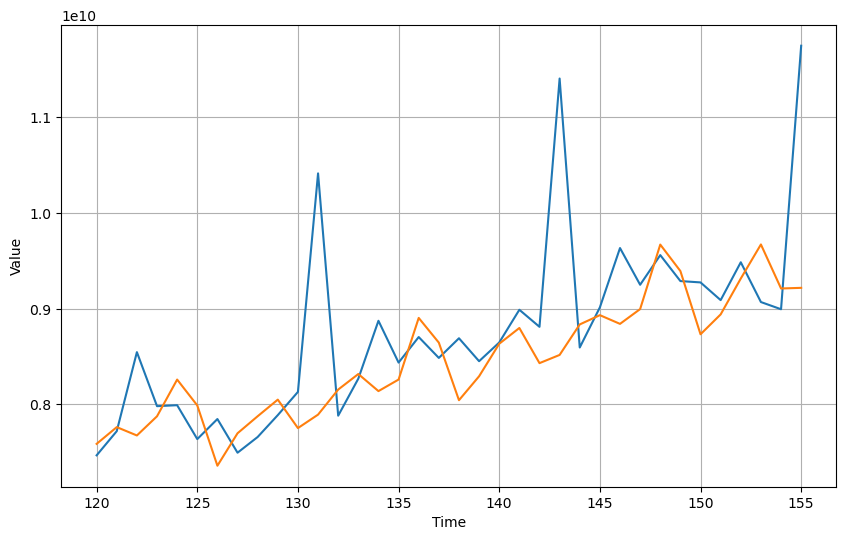

In [19]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [20]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.0501680225785048


In [21]:
# 元系列でもエポック数500でちょうどいい感じ

In [22]:
%%time
# 学習率の大まかなエリアを絞り込む
# PReLU・エポック数500

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = Sequential()
model.add(Dense(10, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mape", optimizer=optimizer)
history = model.fit(dataset, epochs=500, callbacks=[lr_schedule], verbose=0)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


CPU times: user 14.3 s, sys: 2.05 s, total: 16.3 s
Wall time: 12.3 s


(1e-08, 0.001, 0.0, 300.0)

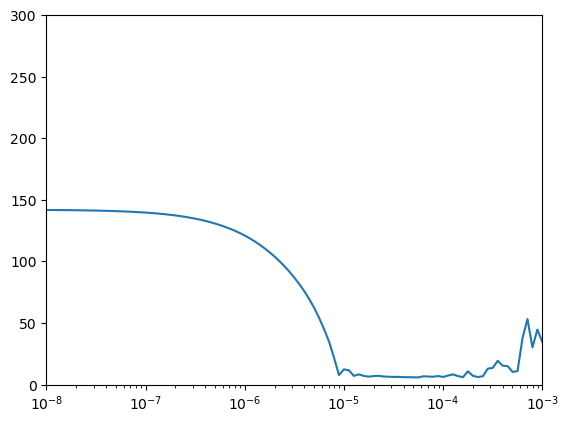

In [23]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

(1e-05, 0.001, 0.0, 20.0)

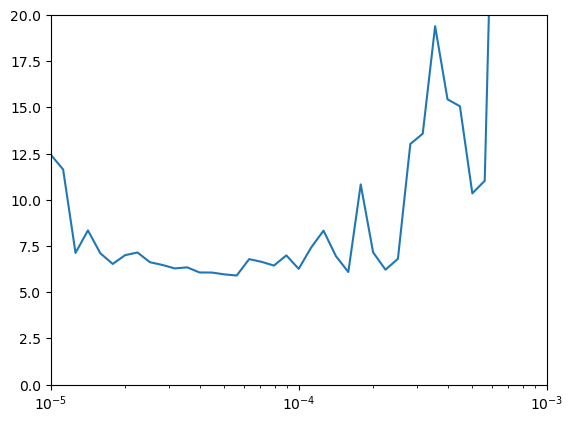

In [25]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-5, 1e-3, 0, 20])

In [26]:
# 元系列では0.1〜1*10^-5くらいのエポック数でMAPEが最小になる

In [31]:
# ここまでのパラメータのまとめ
# エポック数：500〜5000にかけてMAPEは減少するが、大差ないため計算速度を考慮して500
# 学習率：0.1〜1*10^-5

In [32]:
# keras tunerでニューロンの数を試すための予備シミュレーションをする

In [53]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(5, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(5))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 8ms/step - loss: 158.6750
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 152.2480
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 145.0312
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 137.9146
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 130.8617
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 123.9267
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 117.0463
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 110.3329
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 103.5352
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 96.6786
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 89.9188
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 83.1738
Epoch 13/500
4/4 [==============================] - 

4/4 [==============================] - 0s 2ms/step - loss: 8.0477
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 8.0197
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 8.0169
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 8.0274
Epoch 108/500
4/4 [==============================] - 0s 1ms/step - loss: 7.9685
Epoch 109/500
4/4 [==============================] - 0s 2ms/step - loss: 7.9364
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 7.9280
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 7.9997
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 8.0874
Epoch 113/500
4/4 [==============================] - 0s 2ms/step - loss: 8.2368
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 7.9984
Epoch 115/500
4/4 [==============================] - 0s 2ms/step - loss: 7.9235
Epoch 116/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 7.3432
Epoch 207/500
4/4 [==============================] - 0s 3ms/step - loss: 7.5065
Epoch 208/500
4/4 [==============================] - 0s 2ms/step - loss: 7.4199
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3146
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 7.4370
Epoch 211/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3279
Epoch 212/500
4/4 [==============================] - 0s 2ms/step - loss: 7.2997
Epoch 213/500
4/4 [==============================] - 0s 3ms/step - loss: 7.3454
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3138
Epoch 215/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3022
Epoch 216/500
4/4 [==============================] - 0s 14ms/step - loss: 7.5164
Epoch 217/500
4/4 [==============================] - 0s 3ms/step - loss: 7.4323
Epoch 218/500
4/4 [==============================] - 

4/4 [==============================] - 0s 3ms/step - loss: 7.1813
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9519
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 7.0099
Epoch 311/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0339
Epoch 312/500
4/4 [==============================] - 0s 3ms/step - loss: 6.9602
Epoch 313/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9753
Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9388
Epoch 315/500
4/4 [==============================] - 0s 2ms/step - loss: 6.9180
Epoch 316/500
4/4 [==============================] - 0s 3ms/step - loss: 6.9169
Epoch 317/500
4/4 [==============================] - 0s 2ms/step - loss: 7.0265
Epoch 318/500
4/4 [==============================] - 0s 3ms/step - loss: 6.9492
Epoch 319/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0208
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 6.7123
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 6.6964
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 6.6952
Epoch 413/500
4/4 [==============================] - 0s 2ms/step - loss: 6.7371
Epoch 414/500
4/4 [==============================] - 0s 3ms/step - loss: 6.7464
Epoch 415/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6811
Epoch 416/500
4/4 [==============================] - 0s 4ms/step - loss: 6.8654
Epoch 417/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6997
Epoch 418/500
4/4 [==============================] - 0s 3ms/step - loss: 6.7144
Epoch 419/500
4/4 [==============================] - 0s 4ms/step - loss: 6.6892
Epoch 420/500
4/4 [==============================] - 0s 3ms/step - loss: 6.7000
Epoch 421/500
4/4 [==============================] - 0s 2ms/step - loss: 6.6847
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 14ms/step


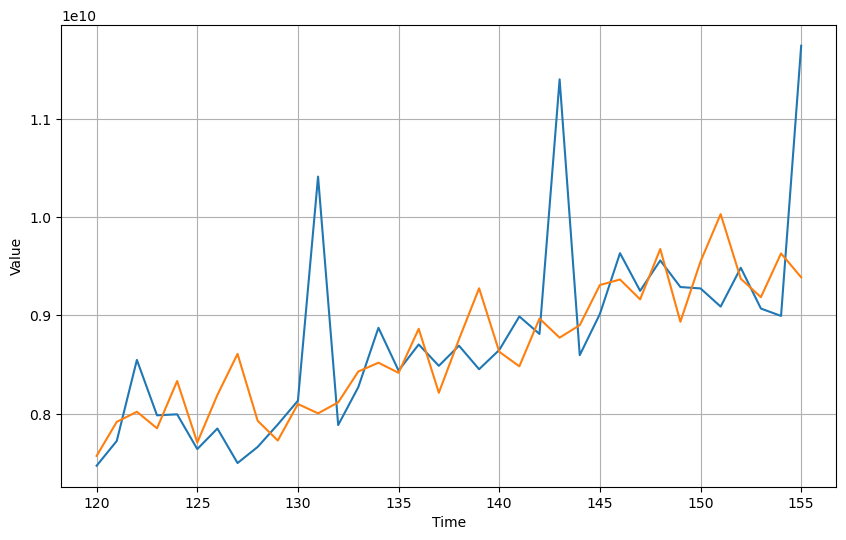

In [54]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [55]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.04966123266450087


In [56]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(15, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(15))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 11ms/step - loss: 114.8706
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 97.1303
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 75.6956
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 52.4948
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 28.8525
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 15.2748
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 12.9997
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 12.5424
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 12.2384
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 12.0675
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 11.5913
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 11.3634
Epoch 13/500
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 7.3175
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3702
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3344
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 7.4555
Epoch 108/500
4/4 [==============================] - 0s 3ms/step - loss: 7.3452
Epoch 109/500
4/4 [==============================] - 0s 2ms/step - loss: 7.2963
Epoch 110/500
4/4 [==============================] - 0s 3ms/step - loss: 7.2775
Epoch 111/500
4/4 [==============================] - 0s 3ms/step - loss: 7.2265
Epoch 112/500
4/4 [==============================] - 0s 3ms/step - loss: 7.2687
Epoch 113/500
4/4 [==============================] - 0s 4ms/step - loss: 7.1591
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 7.2783
Epoch 115/500
4/4 [==============================] - 0s 2ms/step - loss: 7.1723
Epoch 116/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 5.9158
Epoch 207/500
4/4 [==============================] - 0s 3ms/step - loss: 5.8950
Epoch 208/500
4/4 [==============================] - 0s 3ms/step - loss: 6.3789
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 6.5557
Epoch 210/500
4/4 [==============================] - 0s 7ms/step - loss: 5.9360
Epoch 211/500
4/4 [==============================] - 0s 5ms/step - loss: 6.0955
Epoch 212/500
4/4 [==============================] - 0s 6ms/step - loss: 5.9084
Epoch 213/500
4/4 [==============================] - 0s 2ms/step - loss: 5.9049
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 5.8504
Epoch 215/500
4/4 [==============================] - 0s 3ms/step - loss: 5.8734
Epoch 216/500
4/4 [==============================] - 0s 2ms/step - loss: 5.8196
Epoch 217/500
4/4 [==============================] - 0s 3ms/step - loss: 5.9795
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 5.2606
Epoch 309/500
4/4 [==============================] - 0s 3ms/step - loss: 5.3617
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 5.1139
Epoch 311/500
4/4 [==============================] - 0s 3ms/step - loss: 5.0684
Epoch 312/500
4/4 [==============================] - 0s 3ms/step - loss: 5.0682
Epoch 313/500
4/4 [==============================] - 0s 2ms/step - loss: 5.0253
Epoch 314/500
4/4 [==============================] - 0s 3ms/step - loss: 5.1640
Epoch 315/500
4/4 [==============================] - 0s 2ms/step - loss: 5.0771
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 5.0920
Epoch 317/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3021
Epoch 318/500
4/4 [==============================] - 0s 1ms/step - loss: 5.1231
Epoch 319/500
4/4 [==============================] - 0s 2ms/step - loss: 5.2011
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 4.7769
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 4.9800
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6694
Epoch 413/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6543
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 4.8257
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 4.9375
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 4.8770
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6274
Epoch 418/500
4/4 [==============================] - 0s 1ms/step - loss: 4.7407
Epoch 419/500
4/4 [==============================] - 0s 2ms/step - loss: 4.5539
Epoch 420/500
4/4 [==============================] - 0s 2ms/step - loss: 4.5837
Epoch 421/500
4/4 [==============================] - 0s 2ms/step - loss: 4.8124
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 15ms/step


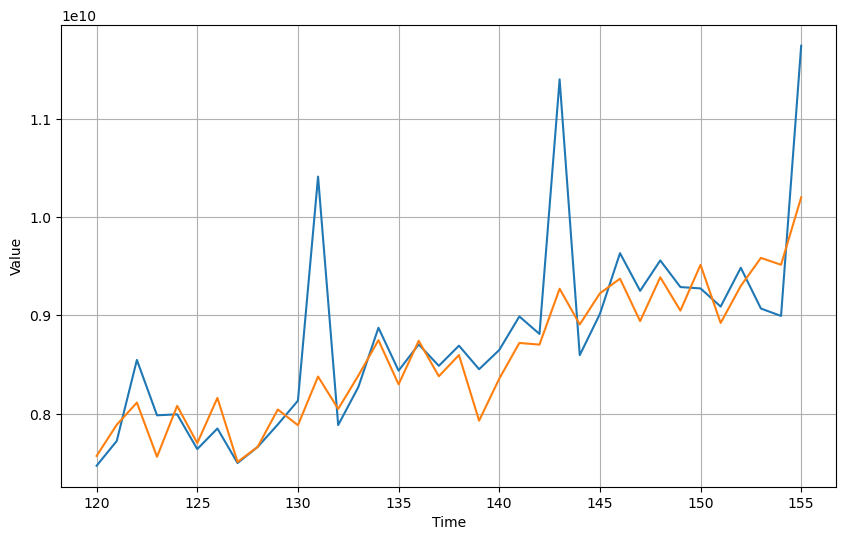

In [57]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [58]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.03709238205486361


In [59]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(20, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(20))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 10ms/step - loss: 16.2047
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 9.5790
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 9.4573
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 9.3638
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 9.1943
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 9.1388
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 9.1430
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 9.0500
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 8.9074
Epoch 10/500
4/4 [==============================] - 0s 23ms/step - loss: 9.0135
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 8.7518
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 8.7675
Epoch 13/500
4/4 [==============================] - 0s 5ms/step - loss

4/4 [==============================] - 0s 3ms/step - loss: 7.8617
Epoch 105/500
4/4 [==============================] - 0s 4ms/step - loss: 7.8985
Epoch 106/500
4/4 [==============================] - 0s 3ms/step - loss: 7.8802
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 8.1060
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 7.8602
Epoch 109/500
4/4 [==============================] - 0s 3ms/step - loss: 7.9659
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 7.8478
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 7.9884
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 8.5090
Epoch 113/500
4/4 [==============================] - 0s 2ms/step - loss: 7.7889
Epoch 114/500
4/4 [==============================] - 0s 3ms/step - loss: 7.8093
Epoch 115/500
4/4 [==============================] - 0s 4ms/step - loss: 7.9358
Epoch 116/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 7.3184
Epoch 207/500
4/4 [==============================] - 0s 3ms/step - loss: 7.2853
Epoch 208/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1511
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 7.2491
Epoch 210/500
4/4 [==============================] - 0s 3ms/step - loss: 7.2038
Epoch 211/500
4/4 [==============================] - 0s 2ms/step - loss: 7.2785
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1987
Epoch 213/500
4/4 [==============================] - 0s 2ms/step - loss: 7.2542
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 7.1565
Epoch 215/500
4/4 [==============================] - 0s 2ms/step - loss: 7.1612
Epoch 216/500
4/4 [==============================] - 0s 2ms/step - loss: 7.2392
Epoch 217/500
4/4 [==============================] - 0s 3ms/step - loss: 7.2971
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 6.4509
Epoch 309/500
4/4 [==============================] - 0s 7ms/step - loss: 6.7892
Epoch 310/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4046
Epoch 311/500
4/4 [==============================] - 0s 3ms/step - loss: 6.5853
Epoch 312/500
4/4 [==============================] - 0s 4ms/step - loss: 6.4282
Epoch 313/500
4/4 [==============================] - 0s 4ms/step - loss: 6.3822
Epoch 314/500
4/4 [==============================] - 0s 3ms/step - loss: 6.5582
Epoch 315/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4011
Epoch 316/500
4/4 [==============================] - 0s 3ms/step - loss: 6.3282
Epoch 317/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4153
Epoch 318/500
4/4 [==============================] - 0s 3ms/step - loss: 6.3452
Epoch 319/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3534
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 5.8234
Epoch 411/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7635
Epoch 412/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7756
Epoch 413/500
4/4 [==============================] - 0s 3ms/step - loss: 6.2168
Epoch 414/500
4/4 [==============================] - 0s 3ms/step - loss: 5.9791
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7743
Epoch 416/500
4/4 [==============================] - 0s 3ms/step - loss: 5.8897
Epoch 417/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7617
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 6.0114
Epoch 419/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7384
Epoch 420/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7739
Epoch 421/500
4/4 [==============================] - 0s 2ms/step - loss: 6.1260
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 13ms/step


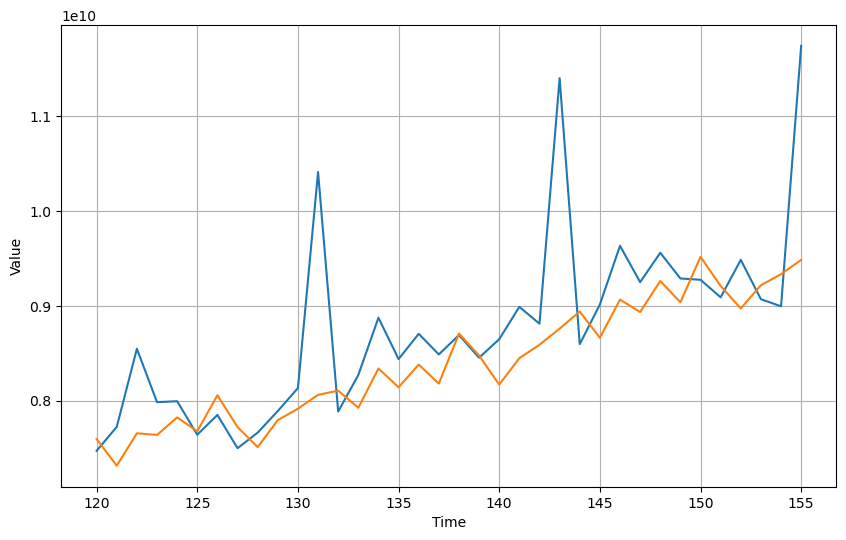

In [60]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [61]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.04915753195986796


In [67]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(25, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(25))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 8ms/step - loss: 8.6981
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 7.2819
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 7.1129
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 7.2884
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 7.0187
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 7.1310
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0885
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 7.0350
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 7.0059
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1462
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 7.0079
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 6.9764
Epoch 13/500
4/4 [==============================] - 0s 5ms/st

4/4 [==============================] - 0s 3ms/step - loss: 6.0815
Epoch 105/500
4/4 [==============================] - 0s 3ms/step - loss: 5.6394
Epoch 106/500
4/4 [==============================] - 0s 4ms/step - loss: 5.5795
Epoch 107/500
4/4 [==============================] - 0s 3ms/step - loss: 5.4929
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 5.6813
Epoch 109/500
4/4 [==============================] - 0s 4ms/step - loss: 5.7535
Epoch 110/500
4/4 [==============================] - 0s 4ms/step - loss: 5.5069
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 5.5402
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 5.4848
Epoch 113/500
4/4 [==============================] - 0s 2ms/step - loss: 5.6361
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 5.6865
Epoch 115/500
4/4 [==============================] - 0s 2ms/step - loss: 5.4561
Epoch 116/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 5.1283
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 4.9888
Epoch 208/500
4/4 [==============================] - 0s 2ms/step - loss: 4.8992
Epoch 209/500
4/4 [==============================] - 0s 4ms/step - loss: 5.1441
Epoch 210/500
4/4 [==============================] - 0s 3ms/step - loss: 4.9286
Epoch 211/500
4/4 [==============================] - 0s 3ms/step - loss: 5.4147
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 5.1859
Epoch 213/500
4/4 [==============================] - 0s 3ms/step - loss: 5.3071
Epoch 214/500
4/4 [==============================] - 0s 3ms/step - loss: 4.8529
Epoch 215/500
4/4 [==============================] - 0s 3ms/step - loss: 5.2118
Epoch 216/500
4/4 [==============================] - 0s 2ms/step - loss: 5.0543
Epoch 217/500
4/4 [==============================] - 0s 2ms/step - loss: 5.1857
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 5.3449
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 4.5100
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 4.4668
Epoch 311/500
4/4 [==============================] - 0s 3ms/step - loss: 4.5581
Epoch 312/500
4/4 [==============================] - 0s 3ms/step - loss: 4.5079
Epoch 313/500
4/4 [==============================] - 0s 2ms/step - loss: 4.4900
Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6985
Epoch 315/500
4/4 [==============================] - 0s 2ms/step - loss: 4.4711
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 4.4785
Epoch 317/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6978
Epoch 318/500
4/4 [==============================] - 0s 2ms/step - loss: 4.5664
Epoch 319/500
4/4 [==============================] - 0s 2ms/step - loss: 4.5710
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 4.1103
Epoch 411/500
4/4 [==============================] - 0s 3ms/step - loss: 4.1235
Epoch 412/500
4/4 [==============================] - 0s 3ms/step - loss: 4.1060
Epoch 413/500
4/4 [==============================] - 0s 2ms/step - loss: 4.2577
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 4.4725
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 4.0851
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 4.3768
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 4.3420
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 4.0728
Epoch 419/500
4/4 [==============================] - 0s 2ms/step - loss: 4.4445
Epoch 420/500
4/4 [==============================] - 0s 2ms/step - loss: 4.1756
Epoch 421/500
4/4 [==============================] - 0s 2ms/step - loss: 4.1237
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 17ms/step


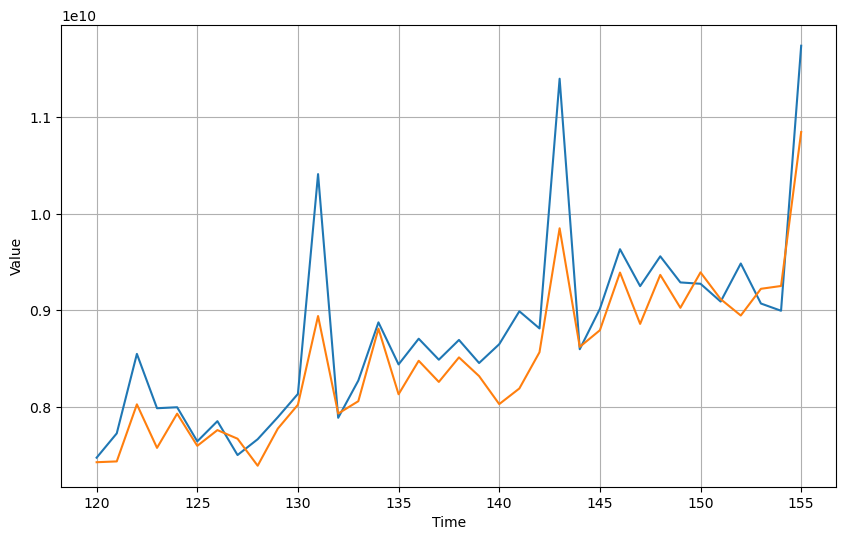

In [68]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [69]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.03443802622765417


In [70]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(30, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(30))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 28ms/step - loss: 145.7458
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 138.9423
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 131.5783
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 124.6930
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 118.2691
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 112.1595
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 106.1858
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 100.2539
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 94.3323
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 88.4724
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 82.6176
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 76.9831
Epoch 13/500
4/4 [==============================] - 

4/4 [==============================] - 0s 2ms/step - loss: 5.7610
Epoch 105/500
4/4 [==============================] - 0s 11ms/step - loss: 5.8469
Epoch 106/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7708
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7300
Epoch 108/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7307
Epoch 109/500
4/4 [==============================] - 0s 6ms/step - loss: 5.7213
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7229
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7449
Epoch 112/500
4/4 [==============================] - 0s 4ms/step - loss: 5.7039
Epoch 113/500
4/4 [==============================] - 0s 2ms/step - loss: 5.8038
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7709
Epoch 115/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7105
Epoch 116/500
4/4 [==============================] - 

4/4 [==============================] - 0s 2ms/step - loss: 5.4941
Epoch 207/500
4/4 [==============================] - 0s 4ms/step - loss: 5.4806
Epoch 208/500
4/4 [==============================] - 0s 3ms/step - loss: 5.5699
Epoch 209/500
4/4 [==============================] - 0s 8ms/step - loss: 5.4871
Epoch 210/500
4/4 [==============================] - 0s 3ms/step - loss: 5.5079
Epoch 211/500
4/4 [==============================] - 0s 3ms/step - loss: 5.5793
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 5.6662
Epoch 213/500
4/4 [==============================] - 0s 4ms/step - loss: 5.5914
Epoch 214/500
4/4 [==============================] - 0s 3ms/step - loss: 5.5834
Epoch 215/500
4/4 [==============================] - 0s 4ms/step - loss: 5.4780
Epoch 216/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7279
Epoch 217/500
4/4 [==============================] - 0s 2ms/step - loss: 5.5863
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 5.3263
Epoch 309/500
4/4 [==============================] - 0s 3ms/step - loss: 5.6155
Epoch 310/500
4/4 [==============================] - 0s 3ms/step - loss: 5.3553
Epoch 311/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3460
Epoch 312/500
4/4 [==============================] - 0s 4ms/step - loss: 5.5519
Epoch 313/500
4/4 [==============================] - 0s 3ms/step - loss: 5.3791
Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3457
Epoch 315/500
4/4 [==============================] - 0s 3ms/step - loss: 5.3467
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3162
Epoch 317/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3444
Epoch 318/500
4/4 [==============================] - 0s 3ms/step - loss: 5.3756
Epoch 319/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3070
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 5.2601
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 5.2275
Epoch 412/500
4/4 [==============================] - 0s 4ms/step - loss: 5.3058
Epoch 413/500
4/4 [==============================] - 0s 3ms/step - loss: 5.1844
Epoch 414/500
4/4 [==============================] - 0s 3ms/step - loss: 5.1865
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 5.2530
Epoch 416/500
4/4 [==============================] - 0s 3ms/step - loss: 5.1816
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 5.2235
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 5.2228
Epoch 419/500
4/4 [==============================] - 0s 4ms/step - loss: 5.2051
Epoch 420/500
4/4 [==============================] - 0s 4ms/step - loss: 5.2359
Epoch 421/500
4/4 [==============================] - 0s 4ms/step - loss: 5.2248
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 15ms/step


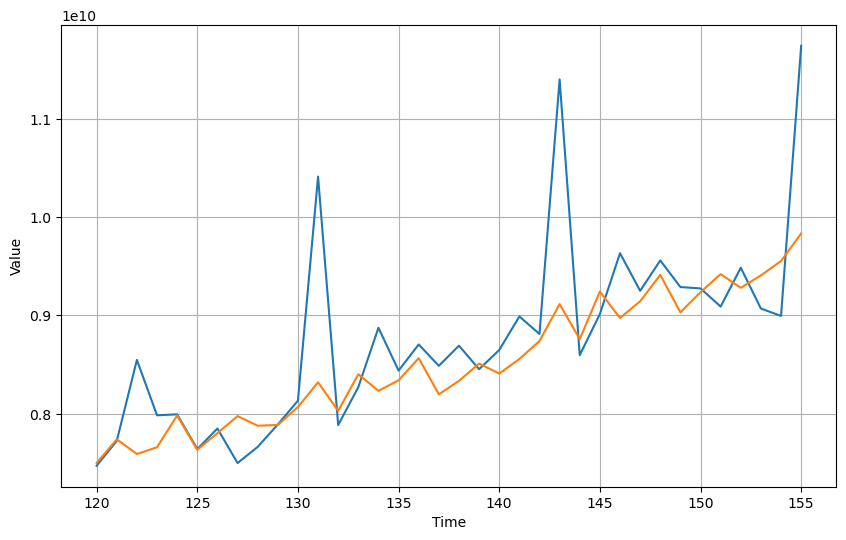

In [71]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [72]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.04056924502783622


In [73]:
%%time
# ここからkeras tunerを使ってパラメータを調整する
# まず最初は時間短縮のためにパラメータの幅を少なくして行う
# PReLU・エポック数500
# my_dir/PReLU_500_1

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):

  model = Sequential()
  model.add(Dense(units=hp.Int('units1', min_value=5, max_value=30, step=5), input_shape=[window_size]))
  model.add(PReLU())
  model.add(Dense(units=hp.Int('units2', min_value=5, max_value=30, step=5)))
  model.add(PReLU())
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-5))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=30, executions_per_trial=3, directory='my_dir', project_name='PReLU_500')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=0)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Search space summary
Default search space size: 3
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 30, 'step': 5, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 30, 'step': 5, 'sampling': None}
momentum (Choice)
{'default': 0.5, 'conditions': [], 'values': [0.5, 0.7, 0.9], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
CPU times: user 22min 29s, sys: 3min 9s, total: 25min 39s
Wall time: 18min 48s


In [74]:
tuner.results_summary()

Results summary
Results in my_dir/PReLU_500
Showing 10 best trials
Trial summary
Hyperparameters:
units1: 30
units2: 10
momentum: 0.9
Score: 4.481114546457927
Trial summary
Hyperparameters:
units1: 25
units2: 15
momentum: 0.7
Score: 4.915422757466634
Trial summary
Hyperparameters:
units1: 25
units2: 15
momentum: 0.5
Score: 5.278315703074138
Trial summary
Hyperparameters:
units1: 20
units2: 15
momentum: 0.5
Score: 5.348505020141602
Trial summary
Hyperparameters:
units1: 15
units2: 30
momentum: 0.5
Score: 5.4366176923116045
Trial summary
Hyperparameters:
units1: 30
units2: 15
momentum: 0.7
Score: 5.461739540100098
Trial summary
Hyperparameters:
units1: 25
units2: 20
momentum: 0.7
Score: 5.512680689493815
Trial summary
Hyperparameters:
units1: 20
units2: 20
momentum: 0.5
Score: 5.638042291005452
Trial summary
Hyperparameters:
units1: 20
units2: 25
momentum: 0.5
Score: 5.651357173919678
Trial summary
Hyperparameters:
units1: 20
units2: 10
momentum: 0.9
Score: 5.743675867716472


In [75]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(30, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 12ms/step - loss: 89.8073
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 75.2341
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 49.5863
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 16.7538
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 17.5222
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 20.6849
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 9.6750
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 10.9755
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 9.3607
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 9.0189
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 10.2428
Epoch 12/500
4/4 [==============================] - 0s 21ms/step - loss: 7.1106
Epoch 13/500
4/4 [==============================] -

4/4 [==============================] - 0s 3ms/step - loss: 6.1122
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 5.8914
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 5.9195
Epoch 107/500
4/4 [==============================] - 0s 3ms/step - loss: 5.9357
Epoch 108/500
4/4 [==============================] - 0s 3ms/step - loss: 5.6543
Epoch 109/500
4/4 [==============================] - 0s 3ms/step - loss: 5.6765
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7664
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 5.9228
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 5.8376
Epoch 113/500
4/4 [==============================] - 0s 3ms/step - loss: 6.4935
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7303
Epoch 115/500
4/4 [==============================] - 0s 2ms/step - loss: 6.0524
Epoch 116/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 5.5443
Epoch 207/500
4/4 [==============================] - 0s 3ms/step - loss: 5.2266
Epoch 208/500
4/4 [==============================] - 0s 2ms/step - loss: 5.2295
Epoch 209/500
4/4 [==============================] - 0s 3ms/step - loss: 5.2233
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 5.5297
Epoch 211/500
4/4 [==============================] - 0s 2ms/step - loss: 6.0228
Epoch 212/500
4/4 [==============================] - 0s 2ms/step - loss: 5.5730
Epoch 213/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3604
Epoch 214/500
4/4 [==============================] - 0s 3ms/step - loss: 5.4232
Epoch 215/500
4/4 [==============================] - 0s 2ms/step - loss: 5.5891
Epoch 216/500
4/4 [==============================] - 0s 2ms/step - loss: 5.2641
Epoch 217/500
4/4 [==============================] - 0s 3ms/step - loss: 5.3678
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step - loss: 4.8132
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 4.8395
Epoch 310/500
4/4 [==============================] - 0s 3ms/step - loss: 5.2044
Epoch 311/500
4/4 [==============================] - 0s 3ms/step - loss: 4.8900
Epoch 312/500
4/4 [==============================] - 0s 3ms/step - loss: 4.8691
Epoch 313/500
4/4 [==============================] - 0s 4ms/step - loss: 4.8278
Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 5.0448
Epoch 315/500
4/4 [==============================] - 0s 3ms/step - loss: 4.9387
Epoch 316/500
4/4 [==============================] - 0s 3ms/step - loss: 4.7927
Epoch 317/500
4/4 [==============================] - 0s 3ms/step - loss: 4.8377
Epoch 318/500
4/4 [==============================] - 0s 2ms/step - loss: 4.7706
Epoch 319/500
4/4 [==============================] - 0s 3ms/step - loss: 4.8230
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 4.8448
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 4.7687
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 4.5195
Epoch 413/500
4/4 [==============================] - 0s 3ms/step - loss: 4.5200
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 4.9600
Epoch 415/500
4/4 [==============================] - 0s 3ms/step - loss: 4.6536
Epoch 416/500
4/4 [==============================] - 0s 3ms/step - loss: 4.5692
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6643
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6679
Epoch 419/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6973
Epoch 420/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6946
Epoch 421/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6802
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 14ms/step


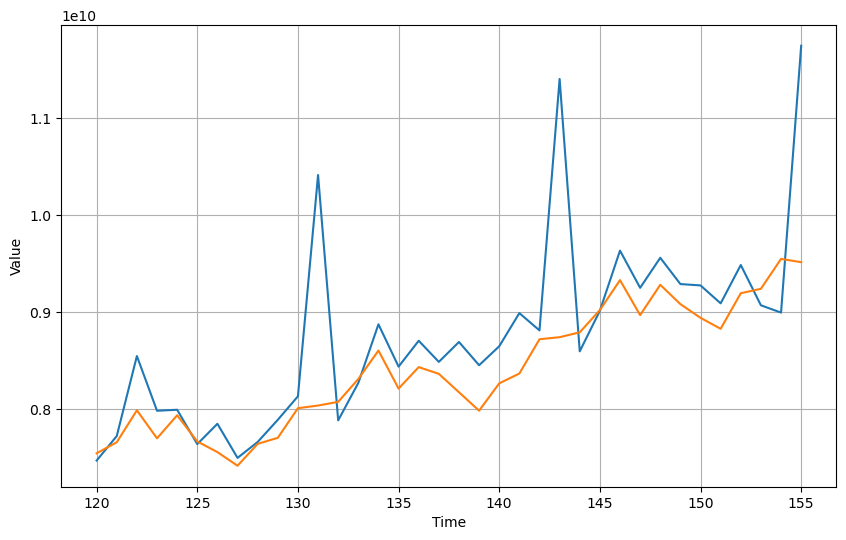

In [76]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [77]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.04314711910959121


In [78]:
%%time
# PReLU・エポック数500
# my_dir/PReLU_500_2

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):

  model = Sequential()
  model.add(Dense(units=hp.Int('units1', min_value=4, max_value=30, step=2), input_shape=[window_size]))
  model.add(PReLU())
  model.add(Dense(units=hp.Int('units2', min_value=4, max_value=30, step=2)))
  model.add(PReLU())
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-5))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=50, executions_per_trial=3, directory='my_dir', project_name='PReLU_500_2')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=0)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Search space summary
Default search space size: 3
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 30, 'step': 2, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 30, 'step': 2, 'sampling': None}
momentum (Choice)
{'default': 0.5, 'conditions': [], 'values': [0.5, 0.7, 0.9], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
CPU times: user 37min 8s, sys: 5min 16s, total: 42min 25s
Wall time: 30min 47s


In [79]:
tuner.results_summary()

Results summary
Results in my_dir/PReLU_500_2
Showing 10 best trials
Trial summary
Hyperparameters:
units1: 12
units2: 14
momentum: 0.9
Score: 5.0061726570129395
Trial summary
Hyperparameters:
units1: 10
units2: 14
momentum: 0.7
Score: 5.1491349538167315
Trial summary
Hyperparameters:
units1: 28
units2: 12
momentum: 0.7
Score: 5.156778176625569
Trial summary
Hyperparameters:
units1: 16
units2: 12
momentum: 0.9
Score: 5.213494618733724
Trial summary
Hyperparameters:
units1: 22
units2: 18
momentum: 0.9
Score: 5.305749893188477
Trial summary
Hyperparameters:
units1: 28
units2: 20
momentum: 0.9
Score: 5.33751916885376
Trial summary
Hyperparameters:
units1: 16
units2: 26
momentum: 0.7
Score: 5.463039398193359
Trial summary
Hyperparameters:
units1: 24
units2: 26
momentum: 0.9
Score: 5.463443120320638
Trial summary
Hyperparameters:
units1: 12
units2: 16
momentum: 0.9
Score: 5.485031604766846
Trial summary
Hyperparameters:
units1: 24
units2: 12
momentum: 0.9
Score: 5.605954488118489


In [80]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(12, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(14))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9))
model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 35ms/step - loss: 115.5880
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 103.0314
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 80.4248
Epoch 4/500
4/4 [==============================] - 0s 48ms/step - loss: 50.9331
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 17.0927
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 18.2995
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 24.5153
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 14.6989
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 9.5622
Epoch 10/500
4/4 [==============================] - 0s 6ms/step - loss: 12.8223
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 10.2952
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 8.1987
Epoch 13/500
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 6.5056
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 6.4648
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 6.4329
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 6.4525
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3895
Epoch 109/500
4/4 [==============================] - 0s 3ms/step - loss: 6.3770
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 6.5122
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 6.4790
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 6.4216
Epoch 113/500
4/4 [==============================] - 0s 2ms/step - loss: 6.3127
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 6.7044
Epoch 115/500
4/4 [==============================] - 0s 2ms/step - loss: 6.7464
Epoch 116/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 5.5368
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7172
Epoch 208/500
4/4 [==============================] - 0s 2ms/step - loss: 5.7666
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 5.5191
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 5.5337
Epoch 211/500
4/4 [==============================] - 0s 3ms/step - loss: 5.4485
Epoch 212/500
4/4 [==============================] - 0s 3ms/step - loss: 5.4595
Epoch 213/500
4/4 [==============================] - 0s 3ms/step - loss: 5.6199
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 5.4998
Epoch 215/500
4/4 [==============================] - 0s 2ms/step - loss: 5.6303
Epoch 216/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3815
Epoch 217/500
4/4 [==============================] - 0s 3ms/step - loss: 5.4480
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 5.3030
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 4.9727
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3799
Epoch 311/500
4/4 [==============================] - 0s 2ms/step - loss: 5.1362
Epoch 312/500
4/4 [==============================] - 0s 3ms/step - loss: 4.7457
Epoch 313/500
4/4 [==============================] - 0s 2ms/step - loss: 5.2230
Epoch 314/500
4/4 [==============================] - 0s 3ms/step - loss: 4.7835
Epoch 315/500
4/4 [==============================] - 0s 3ms/step - loss: 4.7160
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 4.9061
Epoch 317/500
4/4 [==============================] - 0s 3ms/step - loss: 4.6035
Epoch 318/500
4/4 [==============================] - 0s 3ms/step - loss: 4.6312
Epoch 319/500
4/4 [==============================] - 0s 3ms/step - loss: 5.0070
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 5.1176
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 4.9441
Epoch 412/500
4/4 [==============================] - 0s 3ms/step - loss: 4.8886
Epoch 413/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6747
Epoch 414/500
4/4 [==============================] - 0s 3ms/step - loss: 4.5737
Epoch 415/500
4/4 [==============================] - 0s 5ms/step - loss: 4.3106
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 4.3404
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 4.2710
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 4.2292
Epoch 419/500
4/4 [==============================] - 0s 4ms/step - loss: 6.5464
Epoch 420/500
4/4 [==============================] - 0s 2ms/step - loss: 5.2527
Epoch 421/500
4/4 [==============================] - 0s 2ms/step - loss: 5.5483
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 20ms/step


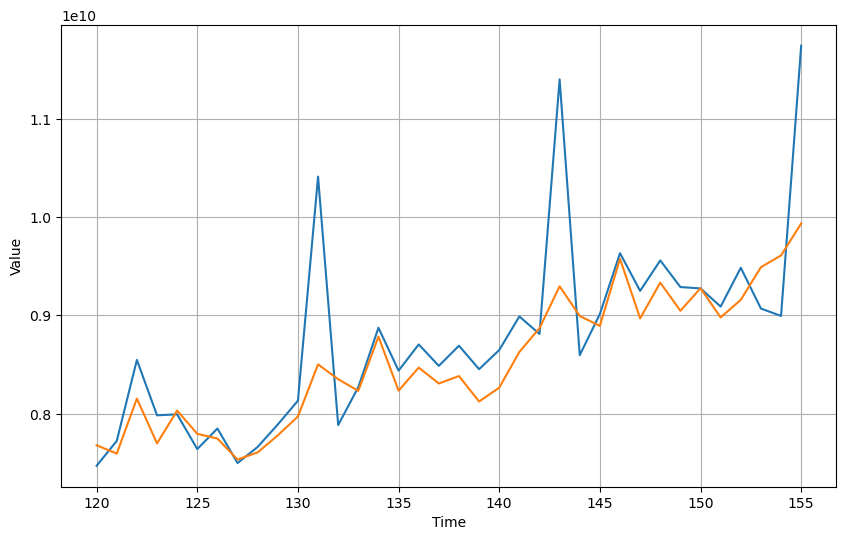

In [81]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [82]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.037528400904760666


In [83]:
%%time
# PReLU・エポック数500
# my_dir/PReLU_500_3

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):

  model = Sequential()
  model.add(Dense(units=hp.Int('units1', min_value=2, max_value=30, step=4), input_shape=[window_size]))
  model.add(PReLU())
  model.add(Dense(units=hp.Int('units2', min_value=2, max_value=30, step=4)))
  model.add(PReLU())
  model.add(Dense(1))

  model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[0.5, 0.7, 0.9]), lr=1e-5))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=60, executions_per_trial=3, directory='my_dir', project_name='PReLU_500_3')

tuner.search_space_summary()

tuner.search(dataset, epochs=500, verbose=0)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Search space summary
Default search space size: 3
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 30, 'step': 4, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 30, 'step': 4, 'sampling': None}
momentum (Choice)
{'default': 0.5, 'conditions': [], 'values': [0.5, 0.7, 0.9], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
CPU times: user 1h 1min 8s, sys: 8min 26s, total: 1h 9min 34s
Wall time: 54min 38s


In [84]:
# メモ
# 月ごとの先月との変動率によって重みを変えてSARIMAとDNNの和となる予測値を求める

In [85]:
tuner.results_summary()

Results summary
Results in my_dir/PReLU_500_3
Showing 10 best trials
Trial summary
Hyperparameters:
units1: 30
units2: 10
momentum: 0.5
Score: 4.930201530456543
Trial summary
Hyperparameters:
units1: 26
units2: 22
momentum: 0.7
Score: 5.16239054997762
Trial summary
Hyperparameters:
units1: 22
units2: 26
momentum: 0.5
Score: 5.19143533706665
Trial summary
Hyperparameters:
units1: 18
units2: 22
momentum: 0.5
Score: 5.198821067810059
Trial summary
Hyperparameters:
units1: 18
units2: 14
momentum: 0.5
Score: 5.257916768391927
Trial summary
Hyperparameters:
units1: 26
units2: 26
momentum: 0.7
Score: 5.2966844240824384
Trial summary
Hyperparameters:
units1: 26
units2: 10
momentum: 0.7
Score: 5.400711854298909
Trial summary
Hyperparameters:
units1: 18
units2: 30
momentum: 0.9
Score: 5.4447353680928545
Trial summary
Hyperparameters:
units1: 18
units2: 26
momentum: 0.9
Score: 5.468699773152669
Trial summary
Hyperparameters:
units1: 26
units2: 30
momentum: 0.5
Score: 5.488162994384766


In [104]:
%%time
# PReLU
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(Dense(30, input_shape=[window_size]))
model.add(PReLU())
model.add(Dense(10))
model.add(PReLU())
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset,epochs=500,verbose=1)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/500
4/4 [==============================] - 1s 116ms/step - loss: 37.8203
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 20.9611
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 9.0615
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 7.9115
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 7.8530
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 7.7725
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 7.6769
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 7.6515
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 7.5590
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 7.3728
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 7.3916
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 7.3853
Epoch 13/500
4/4 [==============================] - 0s 4m

4/4 [==============================] - 0s 3ms/step - loss: 5.9921
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 5.9913
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 5.9716
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 6.0477
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 6.0371
Epoch 109/500
4/4 [==============================] - 0s 2ms/step - loss: 6.0222
Epoch 110/500
4/4 [==============================] - 0s 3ms/step - loss: 5.9786
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 6.0129
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 5.9766
Epoch 113/500
4/4 [==============================] - 0s 3ms/step - loss: 6.0060
Epoch 114/500
4/4 [==============================] - 0s 3ms/step - loss: 6.1542
Epoch 115/500
4/4 [==============================] - 0s 2ms/step - loss: 6.0142
Epoch 116/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 5.2453
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 5.2016
Epoch 208/500
4/4 [==============================] - 0s 3ms/step - loss: 5.2951
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3430
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 5.1629
Epoch 211/500
4/4 [==============================] - 0s 2ms/step - loss: 5.1894
Epoch 212/500
4/4 [==============================] - 0s 2ms/step - loss: 5.1365
Epoch 213/500
4/4 [==============================] - 0s 2ms/step - loss: 5.4816
Epoch 214/500
4/4 [==============================] - 0s 3ms/step - loss: 5.3605
Epoch 215/500
4/4 [==============================] - 0s 3ms/step - loss: 5.4038
Epoch 216/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3408
Epoch 217/500
4/4 [==============================] - 0s 3ms/step - loss: 5.5893
Epoch 218/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 5.3312
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 4.8568
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 5.3318
Epoch 311/500
4/4 [==============================] - 0s 2ms/step - loss: 4.7796
Epoch 312/500
4/4 [==============================] - 0s 2ms/step - loss: 4.7667
Epoch 313/500
4/4 [==============================] - 0s 2ms/step - loss: 4.8047
Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 4.8241
Epoch 315/500
4/4 [==============================] - 0s 3ms/step - loss: 4.7052
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 4.9618
Epoch 317/500
4/4 [==============================] - 0s 3ms/step - loss: 5.1374
Epoch 318/500
4/4 [==============================] - 0s 3ms/step - loss: 4.8099
Epoch 319/500
4/4 [==============================] - 0s 2ms/step - loss: 4.7111
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 4.7221
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 4.3855
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6843
Epoch 413/500
4/4 [==============================] - 0s 2ms/step - loss: 4.6130
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 4.5495
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 4.5753
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 4.5073
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 4.3656
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 4.4170
Epoch 419/500
4/4 [==============================] - 0s 2ms/step - loss: 5.0558
Epoch 420/500
4/4 [==============================] - 0s 2ms/step - loss: 4.4109
Epoch 421/500
4/4 [==============================] - 0s 2ms/step - loss: 4.4198
Epoch 422/500
4/4 [==============================] - 0

1/1 [==============================] - 0s 17ms/step


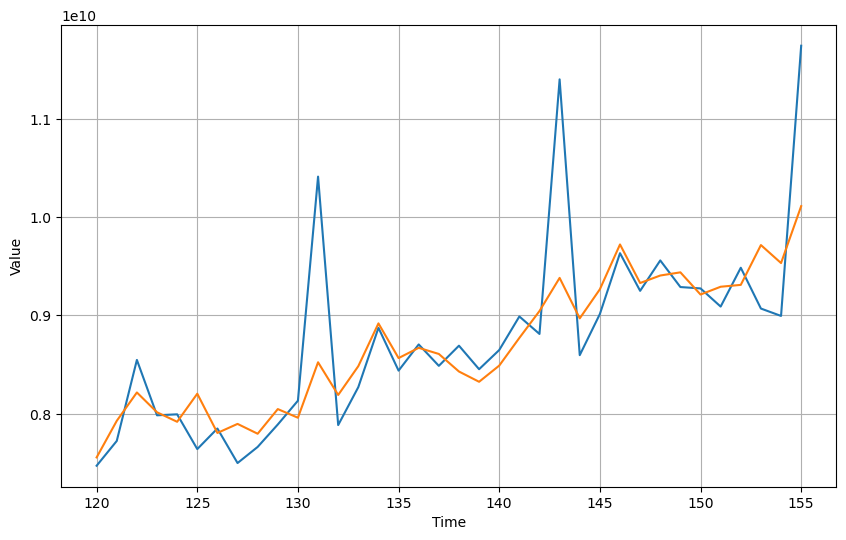

In [105]:
forecast = []
for time in range(156 - window_size):     # 2022年12月のデータが取得できれば168に変更
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [106]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, test_pred))

MAPE:
0.03599476779077948


In [145]:
dnn_test_pred = test_pred

In [89]:
# ここからSARIMAXの値と連結させて予測精度を高めていく

In [92]:
import pandas as pd
import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from matplotlib import pyplot as plt

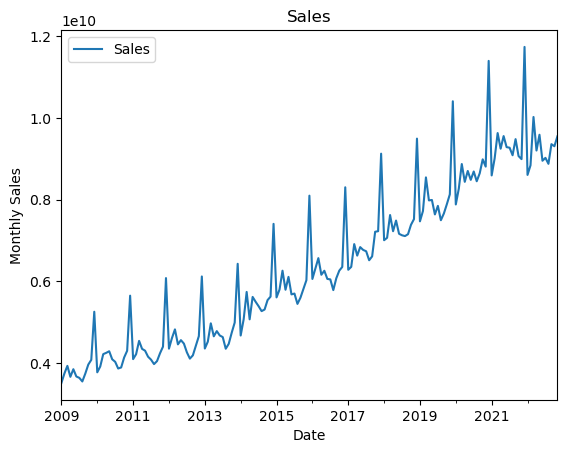

In [93]:
# pandasを使う
# 以下SARIMAX3のファイルと同じ
df = pd.read_csv("../public/seijyo_ishii_monthly_sales.csv", index_col='Month', parse_dates=True)
df.plot()
plt.title('Sales')
plt.ylabel('Monthly Sales')
plt.xlabel('Date')
plt.show()

In [101]:
df_train = df[:120]
df_test = df[120:156]

# 対数変換
df_log = np.log(df).dropna()
df_log_train = df_log[:120]
df_log_test = df_log[120:156]

In [97]:
# pmdarimaのauto_arima関数を使って、ARIMAモデルを自動構築する。

arima_model = pm.auto_arima(df_log_train, 
                            seasonal=True,
                            m=12,
                            trace=True,
                            n_jobs=-1,
                            maxiter=10)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-456.959, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-157.171, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-300.773, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-158.622, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-300.621, Time=0.22 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-450.683, Time=0.16 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-450.372, Time=0.41 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-449.126, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-202.900, Time=0.11 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-348.126, Time=0.38 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-458.882, Time=0.45 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=-459.961, Time=0.30 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-451.162, Time=0.12 sec
 ARIMA(1,1,2)(2,0,1)[12]

In [119]:
# 予測
##学習データの期間の予測値
sarimax_train_log_pred = arima_model.predict_in_sample()
##テストデータの期間の予測値
sarimax_test_log_pred, sarimax_test_log_pred_ci = arima_model.predict(
    n_periods=df_log_test.shape[0], 
    return_conf_int=True
)

sarimax_train_pred = np.exp(sarimax_train_log_pred)
sarimax_test_pred = np.exp(sarimax_test_log_pred)

In [120]:
# 元系列に戻してMAPEを計算
print('MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))

MAPE:
0.04429248442856059


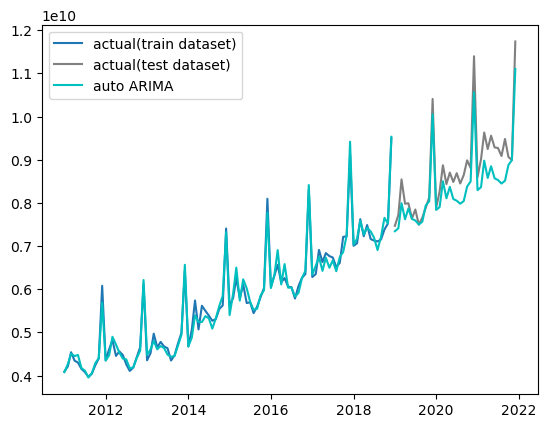

In [122]:
# 元系列のグラフ化
fig, ax = plt.subplots()
ax.plot(df_train[24:].index, df_train[24:].values, label="actual(train dataset)")
ax.plot(df_test.index, df_test.values, label="actual(test dataset)", color="gray")
ax.plot(df_train[24:].index, sarimax_train_pred[24:], color="c")
ax.plot(df_test.index, sarimax_test_pred, label="auto ARIMA", color="c") 
ax.legend()

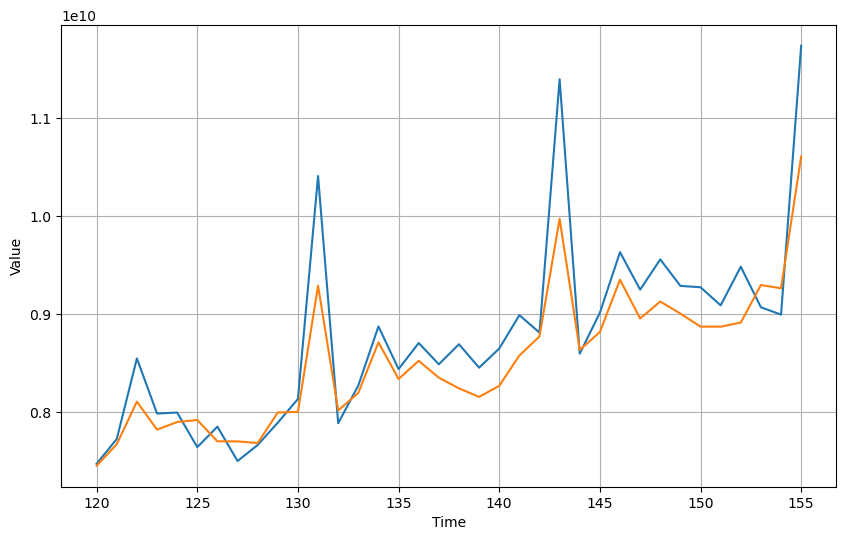

In [131]:
# sarimaxとdnnの平均をとる


dnn_sarimax = np.stack((dnn_test_pred, sarimax_test_pred))
dnn_sarimax_ave_test_pred = np.mean(dnn_sarimax, axis=0)
dnn_sarimax_ave_test_pred

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_sarimax_ave_test_pred)

In [133]:
print('MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_sarimax_ave_test_pred))

MAPE:
0.03216832556421145


In [134]:
# sarimaxとdnnの平均は、sarimax単体・dnn単体よりもMAPEが改善した！

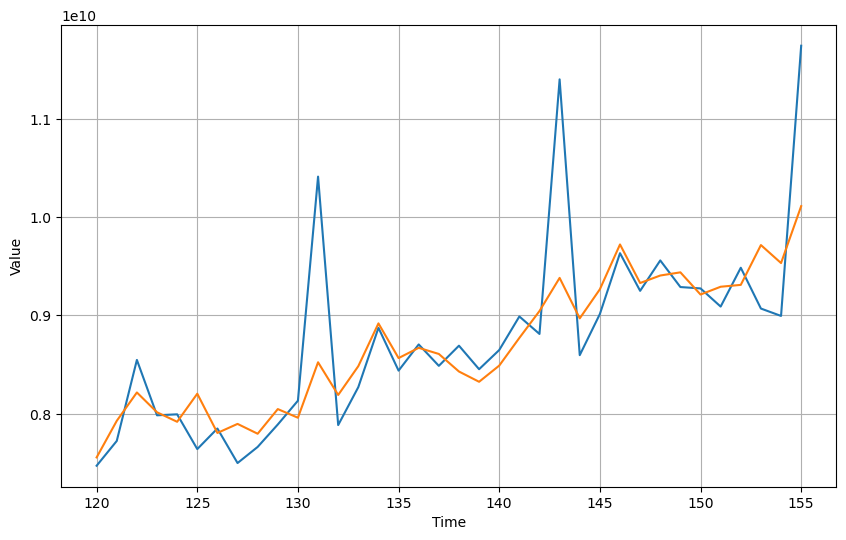

In [141]:
# dnn
plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_test_pred)

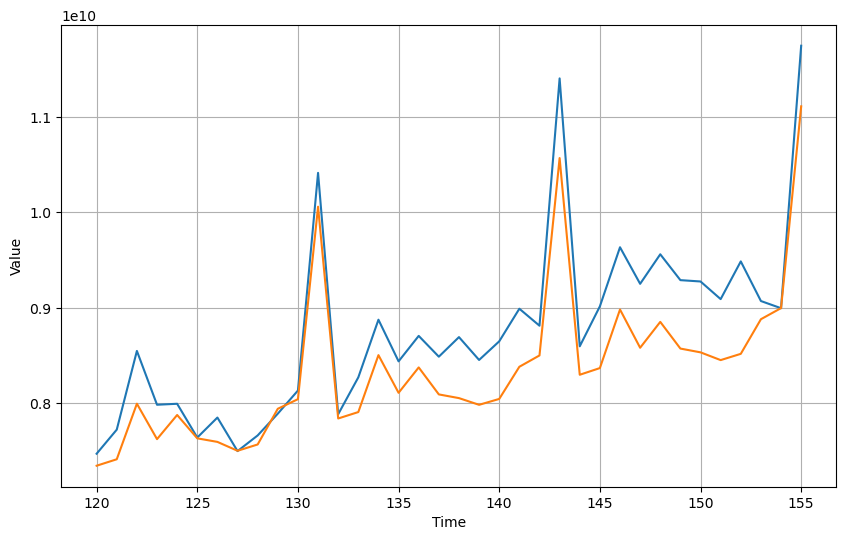

In [142]:
# sarimax
plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, sarimax_test_pred)

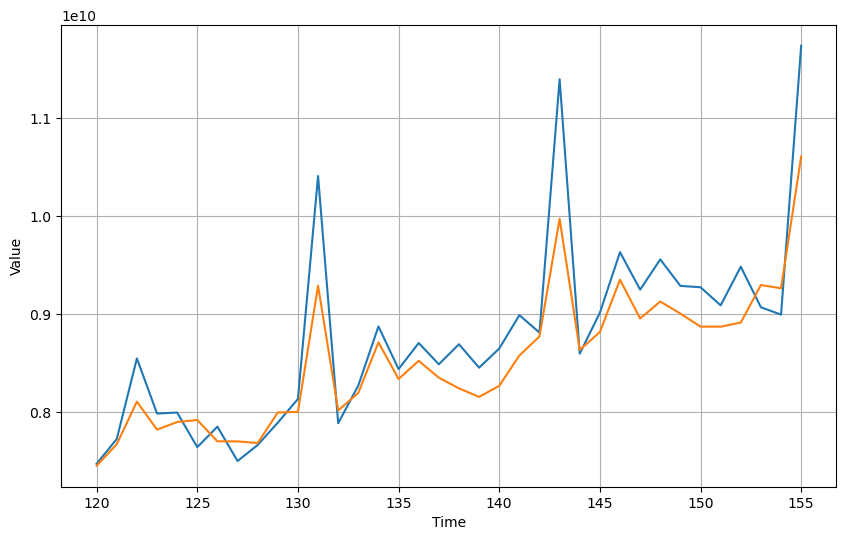

In [143]:
# dnn sarimax average
plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, dnn_sarimax_ave_test_pred)

In [146]:
# MAPE
print('DNN MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_test_pred))
print('SARIMAX MAPE:')
print(mean_absolute_percentage_error(df_test, sarimax_test_pred))
print('DNN SARIMAX AVERAGE MAPE:')
print(mean_absolute_percentage_error(x_valid, dnn_sarimax_ave_test_pred))

DNN MAPE:
0.03599476779077948
SARIMAX MAPE:
0.04429248442856059
DNN SARIMAX AVERAGE MAPE:
0.03216832556421145
